# Travel Package Purchase Prediction  - Visit with us

## Solution with Ensemble Techniques



### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


### Data Dictionary

#### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

 Build **Ensemble Techniques Bagging & Boosting Models** that will help the marketing department to identify the potential customers who have a **higher probability of purchase the newly introduced travel package**.



### Solution Contents 

* Understand given data
* Exploratory Data Analysis - Pre Data processing 
* Data Cleanup/Data processing 
* Exploratory Data Analysis - Post Data processing / Data Cleaning
* Data Visualization
* Data Insigights from EDA 
* Data Preparation & Split Data
* Model building - Bagging
* Model building - Bagging - with performance improvements 
* Model building - Boosting
* Model building - Boosting - with performance improvements 
* Model peformance summary
* Actionable Insights & Recommendations


## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 

### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [1]:
import datetime

start = datetime.datetime.now()

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


<IPython.core.display.Javascript object>

## Load data to dataframe

Read given xlsx file `Tourism.xlsx` and load to data frame `data`.

In [2]:
# reading Tourism data given from company and load to data frame
tourism = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")
# copying orignal data so that when changing data we dont lose original
data = tourism.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [3]:
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<IPython.core.display.Javascript object>

In [4]:
data.tail(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [5]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

**observations on data** 

* Given dataset has 4888 rows and 20 columns
* CustomerID column seems like continous num or row number, since its not related with other columns we can delete later. 
* ProdTaken is dependent target variable.

### Check the data types of the columns in the dataset.

checking data types of all columns 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

**observations on data types** 

* There are few continous and category columns 
* Few columns has missing data in Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome 
* Dependent variable ProdTaken is numeric type column.

### Summary of the data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

In [8]:
data.describe(include="object").T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

**observations on data** 

#### Customer details:

* `CustomerID:` Unique customer ID, This is running number, This column has no value for modeling - we can drop
* `ProdTaken:` Whether the customer has purchased a package or not (0: No, 1: Yes), No missing values, Possible values of 0 & 1. Will check how much % share between 0 and 1 in later stage.
* `Age:` Age of customer - has some missing values, we can treat those in later stages. 75% customers are in 44 age range. Max being 61. This does not look like outliers we can check in details in EDA stages.
* `TypeofContact:` How customer was contacted (Company Invited or Self Inquiry) - category type with 2 possible values where self enquiry being dominant one.
* `CityTier:` City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3, has 3 possible values 1, 2 and 3 
* `Occupation:` Occupation of customer - 4 posssible values with Salaried being dominant one
* `Gender:` Gender of customer - 3 possible values, Male has high share with 2916 occurances 
* `NumberOfPersonVisiting:` Total number of persons planning to take the trip with the customer, values range from 1 to 5, 75% has 3 or below
* `PreferredPropertyStar:` Preferred hotel property rating by customer, range from 3 to 5, 75% has 4 star or below
* `MaritalStatus:` Marital status of customer, has 4 possible values where Married has 2340 occurances 
* `NumberOfTrips:` Average number of trips in a year by customer, 74% has 4 and below and one has 22 which seems like a outlier, we can treat this data. 
* `Passport:` The customer has a passport or not (0: No, 1: Yes) - boolean type value 0 and 1 
* `OwnCar:` Whether the customers own a car or not (0: No, 1: Yes)- boolean type value 0 and 1 
* `NumberOfChildrenVisiting:` Total number of children with age less than 5 planning to take the trip with the customer - values range from 0 to 3, 75% has 2 and below 
* `Designation:` Designation of the customer in the current organization, has 5 possible values. Executing being most with 1842 counts. 
* `MonthlyIncome:` Gross monthly income of the customer, 75% has 25K and below, Theare are some outliers that may need treatment or transformations to different scale to normalize data.

#### Customer interaction data: 

* `PitchSatisfactionScore:` Sales pitch satisfaction score - ranges from 1 to 5, 75% has 4 and below
* `ProductPitched:` Product pitched by the salesperson - has 5 different values, basic being most 
* `NumberOfFollowups:` Total number of follow-ups has been done by the salesperson after the sales pitch - ranges from 0 to 3, where 75% has 2 and below 
* `DurationOfPitch:` Duration of the pitch by a salesperson to the customer - ranges from 5 to 127, 75% has 20 and below, This has outliers we can treat or transform in next stages 



###  Check for Duplicates 
lets check for any duplicate values

In [9]:
# check for any duplicate data
data[data.duplicated()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


<IPython.core.display.Javascript object>


No Duplicate rows, No actions reqd.

## Missing Value Treatment - Data Pre-processing

### Let's check for missing values

lets check which columns has some null values, how many null values

In [10]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

,missing count,missing %
DurationOfPitch,251,0.051350
MonthlyIncome,233,0.047668
Age,226,0.046236
NumberOfTrips,140,0.028642
NumberOfChildrenVisiting,66,0.013502
NumberOfFollowups,45,0.009206
PreferredPropertyStar,26,0.005319
TypeofContact,25,0.005115


<IPython.core.display.Javascript object>

**observations on data missing** 

* `DurationOfPitch:` - has 251 missing values, approx 5% of data is missing
* `MonthlyIncome:` - has 233 missing values, approx 4.7% of data is missing
* `Age:` - has 226 missing values, approx 4.6% of data is missing
* `NumberOfTrips:` - has 140 missing values, approx 2.8% of data is missing
* `NumberOfChildrenVisiting:` - has 66 missing values, approx 1.3% of data is missing
* `NumberOfFollowups:` - has 45 missing values, approx less than 1% of data is missing
* `PreferredPropertyStar:` - has 26 missing values,approx less than 1% of data is missing
* `TypeofContact:` - has 25 missing values, approx less than 1% of data is missing


#### lets check which how many rows has some null values

In [11]:
# counting the number of missing values per row

num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

<IPython.core.display.Javascript object>

**observations on data missing by row** 

* 4128 rows has no missing records.
* 533 rows has one missing record, This can be treated. 
* 202 rows has 2 missing records, lets see what those data are and see how can this be treated.
* 25 rows has 3 missing records, lets see what those data are and see how can this be treated.


#### checking rows with 3 columns has missing values 


**Decision on missing values with 3 values** 

* All the rows with 3 missing values are missing values in columns Tupe of Contact, Duration of the pitch and Montly Income. Intrestingly all are in occupation Small business. 
* Since all 3 feature looks important, Doing missing value treatment will not give us any benifit, it might impact modeling. So we can `delete records with rows missing 3 values`



In [12]:
data[num_missing == 3].sample(n=15)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
843,200843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,201021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN
572,200572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
724,200724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
622,200622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
1469,201469,0,34.0,NaN,1,NaN,Small Business,Male,2,1.0,Deluxe,3.0,Married,3.0,0,3,0,1.0,Manager,NaN
1217,201217,0,24.0,NaN,1,NaN,Small Business,Male,3,1.0,Basic,3.0,Married,2.0,0,1,0,0.0,Executive,NaN
598,200598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
1694,201694,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,3,0,0.0,Manager,NaN
2068,202068,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,1,1.0,Executive,NaN


<IPython.core.display.Javascript object>

In [13]:
## Deleting rows with 3 missing column values

data.drop(data[num_missing == 3].index, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
data[num_missing == 2].sample(n=15)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2074,202074,0,42.0,Self Enquiry,1,NaN,Salaried,Male,3,3.0,Deluxe,4.0,Married,2.0,0,3,1,0.0,Manager,NaN
200,200200,0,27.0,Company Invited,1,NaN,Large Business,Male,2,4.0,Deluxe,5.0,Divorced,6.0,0,3,0,1.0,Manager,NaN
1901,201901,0,NaN,Self Enquiry,1,5.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,1.0,0,1,0,0.0,Manager,NaN
1344,201344,0,37.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,5.0,Married,6.0,1,3,0,0.0,Manager,NaN
756,200756,0,NaN,Company Invited,1,35.0,Small Business,Female,3,3.0,Basic,3.0,Single,1.0,0,3,1,0.0,Executive,NaN
1406,201406,0,54.0,Self Enquiry,1,NaN,Small Business,Female,3,3.0,Deluxe,5.0,Single,7.0,1,1,0,0.0,Manager,NaN
2390,202390,1,34.0,Company Invited,3,NaN,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
1292,201292,0,NaN,Company Invited,3,26.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,3.0,0,3,1,0.0,Manager,NaN
1201,201201,1,NaN,Self Enquiry,1,14.0,Small Business,Male,3,4.0,Basic,3.0,Single,2.0,1,4,1,2.0,Executive,NaN
337,200337,0,NaN,Self Enquiry,1,15.0,Salaried,Male,1,4.0,Basic,3.0,Single,1.0,0,2,1,0.0,Executive,NaN


<IPython.core.display.Javascript object>

**Decision on missing values with 2 values** 

* All the rows with 2 missing values are missing values in columns Monthly income with Age and Duration of the pitch, Since these values can be treated for missing values. We dont want to delete these rows. 

* Missing value treatment can be done in later stages

In [15]:
data[num_missing == 1].sample(n=15)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
259,200259,1,NaN,Company Invited,1,35.0,Small Business,Male,3,4.0,Basic,4.0,Single,1.0,0,3,1,2.0,Executive,18479.0
436,200436,1,NaN,Self Enquiry,1,16.0,Small Business,Male,2,5.0,Basic,3.0,Married,1.0,0,5,0,0.0,Executive,18408.0
737,200737,0,41.0,Self Enquiry,1,13.0,Small Business,Female,2,NaN,Deluxe,3.0,Single,7.0,0,3,1,0.0,Manager,20003.0
778,200778,0,46.0,Self Enquiry,1,NaN,Salaried,Female,3,4.0,Deluxe,5.0,Married,1.0,1,2,1,2.0,Manager,19615.0
2401,202401,1,30.0,Company Invited,1,NaN,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,1,3,0,1.0,Executive,19695.0
2409,202409,1,32.0,Self Enquiry,1,NaN,Small Business,Male,2,3.0,Deluxe,4.0,Married,5.0,0,4,1,1.0,Manager,19883.0
3520,203520,0,55.0,Company Invited,1,18.0,Small Business,Female,3,4.0,Super Deluxe,3.0,Married,5.0,0,3,1,NaN,AVP,34710.0
1286,201286,0,NaN,Self Enquiry,1,8.0,Salaried,Female,2,3.0,Basic,5.0,Married,5.0,0,4,1,1.0,Executive,18377.0
629,200629,0,28.0,Self Enquiry,2,14.0,Small Business,Male,3,NaN,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,19936.0
2368,202368,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,King,3.0,Married,4.0,0,5,1,NaN,VP,34740.0


<IPython.core.display.Javascript object>

**Decision on missing values with 1 values** 

* Values missing on different columns like age, duration o pitch, Number Of Followups, Number Of Trips and Number Of Children Visiting

* All these columns can be treated for missing values in later stages. 


## Missing Values treatment  - with Median Imputation 

Lets fix all missing values before proceeding further 

* We can use mean or median depends on how skewed data is, Normalized data mean can be used, If data is skewed better to use median value. 

* lets find the replacment values first for all cases and replace values 




In [16]:
# list all columns with missing values

print_null_info(data)

,missing count,missing %
Age,226,0.046473
DurationOfPitch,226,0.046473
MonthlyIncome,208,0.042772
NumberOfTrips,140,0.028789
NumberOfChildrenVisiting,66,0.013572
NumberOfFollowups,45,0.009254
PreferredPropertyStar,26,0.005346


<IPython.core.display.Javascript object>

### Missing value treatment - Monthly Income 

Print and check missing values and see how can we create condition and determine imputation value 


In [17]:
data[data["MonthlyIncome"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1545,201545,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,1,2.0,Manager,NaN
2272,202272,0,33.0,Company Invited,3,NaN,Salaried,Female,1,3.0,Deluxe,4.0,Married,1.0,0,4,0,0.0,Manager,NaN
1429,201429,0,NaN,Self Enquiry,1,30.0,Salaried,Male,2,3.0,Deluxe,3.0,Single,1.0,0,4,1,0.0,Manager,NaN
2089,202089,0,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,1.0,Manager,NaN
991,200991,0,NaN,Self Enquiry,3,8.0,Small Business,Male,2,3.0,Deluxe,4.0,Divorced,1.0,1,1,0,1.0,Manager,NaN
140,200140,1,NaN,Self Enquiry,1,15.0,Small Business,Female,2,3.0,Basic,5.0,Single,1.0,0,4,1,1.0,Executive,NaN
696,200696,0,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Divorced,2.0,0,4,1,1.0,Manager,NaN
1065,201065,0,NaN,Self Enquiry,1,10.0,Salaried,Male,1,3.0,Deluxe,3.0,Divorced,1.0,1,4,0,0.0,Manager,NaN
2294,202294,0,42.0,Self Enquiry,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Single,5.0,0,3,1,1.0,Manager,NaN
1347,201347,0,NaN,Company Invited,2,8.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN


<IPython.core.display.Javascript object>

* we can use income by designation, occupation median value to fill montlyincome missing values 
* get all median values by designation, occupation

In [18]:
# Checking MonthlyIncome grouped by Designation and Occupation
data.groupby(["Designation", "Occupation"])["MonthlyIncome"].median()

Designation     Occupation    
AVP             Large Business    31809.0
                Salaried          32288.0
                Small Business    32203.0
Executive       Free Lancer       18929.0
                Large Business    20748.0
                Salaried          20689.0
                Small Business    20682.0
Manager         Large Business    21997.0
                Salaried          22841.0
                Small Business    23005.0
Senior Manager  Large Business    26904.0
                Salaried          26416.0
                Small Business    26332.5
VP              Large Business    36426.5
                Salaried          35859.0
                Small Business    34859.0
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
# Fill median values by Designation and Occupation
data["MonthlyIncome"] = data.groupby(["Designation", "Occupation"])[
    "MonthlyIncome"
].apply(lambda x: x.fillna(x.median()))



<IPython.core.display.Javascript object>

### Missing value treatment - Age

Print and check missing values and see how can we create condition and determine imputation value 


In [20]:
data[data["Age"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1834,201834,0,NaN,Self Enquiry,1,16.0,Small Business,Female,3,3.0,Basic,5.0,Married,7.0,0,1,1,2.0,Executive,18452.0
995,200995,0,NaN,Self Enquiry,1,12.0,Small Business,Female,3,4.0,Deluxe,3.0,Single,2.0,1,4,1,1.0,Manager,23005.0
2210,202210,0,NaN,Self Enquiry,1,16.0,Salaried,Male,2,3.0,Basic,3.0,Married,2.0,0,5,0,0.0,Executive,20689.0
998,200998,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,4.0,Basic,3.0,Single,1.0,0,3,0,0.0,Executive,20682.0
248,200248,0,NaN,Self Enquiry,1,6.0,Small Business,Female,2,4.0,Basic,5.0,Divorced,3.0,0,4,1,1.0,Executive,20682.0
364,200364,0,NaN,Self Enquiry,1,16.0,Small Business,Female,3,3.0,Basic,5.0,Divorced,7.0,0,2,1,1.0,Executive,18452.0
581,200581,0,NaN,Self Enquiry,1,6.0,Salaried,Male,2,5.0,Basic,3.0,Divorced,4.0,0,4,1,0.0,Executive,20689.0
1913,201913,1,NaN,Company Invited,1,10.0,Large Business,Male,3,4.0,Basic,3.0,Single,6.0,0,5,0,0.0,Executive,20748.0
1988,201988,0,NaN,Self Enquiry,3,13.0,Small Business,Female,2,4.0,Deluxe,3.0,Single,1.0,0,1,1,0.0,Manager,23005.0
2136,202136,1,NaN,Self Enquiry,1,9.0,Salaried,Female,2,3.0,Deluxe,3.0,Married,1.0,1,5,1,1.0,Manager,22841.0


<IPython.core.display.Javascript object>

* we can use age by designation, occupation median value to fill age missing values 
* get all median values by designation, occupation

In [21]:
# Checking Age grouped by Designation and Occupation
data.groupby(["Designation", "Occupation"])["Age"].median()

Designation     Occupation    
AVP             Large Business    49.0
                Salaried          47.0
                Small Business    51.0
Executive       Free Lancer       37.5
                Large Business    30.0
                Salaried          33.0
                Small Business    31.0
Manager         Large Business    37.0
                Salaried          36.0
                Small Business    36.0
Senior Manager  Large Business    38.0
                Salaried          38.0
                Small Business    39.0
VP              Large Business    42.5
                Salaried          49.0
                Small Business    49.5
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

In [22]:
# Fill median values by Designation and Occupation
data["Age"] = data.groupby(["Designation", "Occupation"])[
    "Age"
].apply(lambda x: x.fillna(np.around(x.median(), decimals=0)))



<IPython.core.display.Javascript object>

### Missing value treatment - Duration Of Pitch

Print and check missing values and see how can we create condition and determine imputation value 


In [23]:
data[data["DurationOfPitch"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1952,201952,1,31.0,Self Enquiry,3,NaN,Small Business,Male,2,3.0,Deluxe,5.0,Married,3.0,0,1,0,1.0,Manager,23005.0
1584,201584,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,4.0,Deluxe,4.0,Married,7.0,0,3,1,0.0,Manager,19505.0
3355,203355,1,26.0,Company Invited,3,NaN,Salaried,Male,4,6.0,Basic,3.0,Single,3.0,1,1,1,2.0,Executive,19796.0
1133,201133,0,43.0,Self Enquiry,1,NaN,Large Business,Male,2,1.0,Basic,4.0,Married,6.0,0,5,1,1.0,Executive,19876.0
2300,202300,0,41.0,Self Enquiry,1,NaN,Salaried,Male,2,3.0,Basic,3.0,Married,4.0,1,3,1,0.0,Executive,19766.0
931,200931,0,30.0,Company Invited,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Single,1.0,1,3,1,2.0,Manager,19695.0
1850,201850,0,24.0,Self Enquiry,3,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Married,2.0,1,1,0,0.0,Manager,23005.0
2131,202131,0,43.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,4.0,Married,5.0,0,3,1,0.0,Manager,19765.0
2429,202429,1,40.0,Self Enquiry,3,NaN,Small Business,Male,2,3.0,Basic,4.0,Single,2.0,0,5,0,0.0,Executive,19661.0
460,200460,0,26.0,Self Enquiry,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Married,6.0,0,5,1,0.0,Manager,23005.0


<IPython.core.display.Javascript object>

* we can use Duration Of Pitch by City Tier, Occupation and Designation median value to fill Duration Of Pitch missing values 
* get all median values by CityTier, Occupation and Designation

In [24]:
# Checking DurationOfPitch grouped by CityTier, Occupation and Designation
data.groupby(["CityTier", "Designation", "Occupation"])["DurationOfPitch"].median()

CityTier  Designation     Occupation    
1         AVP             Large Business    12.0
                          Salaried          12.0
                          Small Business     9.0
          Executive       Free Lancer        8.5
                          Large Business    11.0
                          Salaried          13.0
                          Small Business    14.0
          Manager         Large Business    12.0
                          Salaried          13.0
                          Small Business    15.0
          Senior Manager  Large Business    11.5
                          Salaried          14.0
                          Small Business    14.0
          VP              Large Business    11.0
                          Salaried          11.0
                          Small Business    11.0
2         AVP             Salaried          24.5
                          Small Business    12.5
          Executive       Large Business     9.0
                          Sa

<IPython.core.display.Javascript object>

In [25]:
# Fill median values
data["DurationOfPitch"] = data.groupby(["CityTier","Designation", "Occupation"])[
    "DurationOfPitch"
].apply(lambda x: x.fillna(np.around(x.median(), decimals=0)))



<IPython.core.display.Javascript object>

### Missing value treatment - Number Of Trips

Print and check missing values and see how can we create condition and determine imputation value 


In [26]:
data[data["NumberOfTrips"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3887,203887,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,4.0,King,3.0,Married,NaN,0,3,1,2.0,VP,37558.0
4713,204713,0,43.0,Self Enquiry,1,9.0,Small Business,Male,3,4.0,Super Deluxe,5.0,Married,NaN,0,3,1,1.0,AVP,36343.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0
4655,204655,0,43.0,Self Enquiry,3,12.0,Small Business,Male,3,4.0,King,3.0,Married,NaN,0,4,0,2.0,VP,36981.0
4818,204818,1,49.0,Self Enquiry,1,22.0,Small Business,Female,4,4.0,Standard,3.0,Married,NaN,0,3,0,1.0,Senior Manager,36943.0
2469,202469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
4772,204772,0,54.0,Self Enquiry,1,14.0,Small Business,Female,3,4.0,King,3.0,Married,NaN,0,1,1,2.0,VP,37284.0
2770,202770,0,40.0,Company Invited,1,6.0,Small Business,Male,3,5.0,King,3.0,Divorced,NaN,0,5,1,2.0,VP,37950.0
3452,203452,0,55.0,Self Enquiry,1,7.0,Small Business,Female,3,4.0,Super Deluxe,3.0,Single,NaN,0,4,1,2.0,AVP,36006.0
4391,204391,0,51.0,Company Invited,2,10.0,Small Business,Male,4,4.0,King,4.0,Married,NaN,0,1,1,3.0,VP,36878.0


<IPython.core.display.Javascript object>

* we can use Number Of Trips by City Tier, Occupation and Designation median value to fill missing values 
* get all median values by CityTier, Occupation and Designation

In [27]:
# Checking NumberOfTrips grouped by CityTier, Occupation and Designation
data.groupby(["CityTier", "Designation", "Occupation"])["NumberOfTrips"].median()

CityTier  Designation     Occupation    
1         AVP             Large Business    2.0
                          Salaried          4.0
                          Small Business    3.0
          Executive       Free Lancer       7.5
                          Large Business    3.0
                          Salaried          3.0
                          Small Business    3.0
          Manager         Large Business    4.0
                          Salaried          3.0
                          Small Business    3.0
          Senior Manager  Large Business    3.0
                          Salaried          3.0
                          Small Business    3.0
          VP              Large Business    3.0
                          Salaried          4.0
                          Small Business    3.0
2         AVP             Salaried          2.5
                          Small Business    2.5
          Executive       Large Business    2.0
                          Salaried          3.0

<IPython.core.display.Javascript object>

In [28]:
# Fill median values 
data["NumberOfTrips"] = data.groupby(["CityTier","Designation", "Occupation"])[
    "NumberOfTrips"
].apply(lambda x: x.fillna(np.around(x.median(), decimals=0)))



<IPython.core.display.Javascript object>

### Missing value treatment - Number Of Children Visiting

Print and check missing values and see how can we create condition and determine imputation value 


In [29]:
data[data["NumberOfChildrenVisiting"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4688,204688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0
3522,203522,0,45.0,Self Enquiry,1,35.0,Salaried,Male,3,4.0,Super Deluxe,5.0,Divorced,5.0,0,1,1,NaN,AVP,35006.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
568,200568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
4506,204506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
1660,201660,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Married,1.0,0,1,1,NaN,VP,34999.0
2219,202219,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Married,2.0,0,3,1,NaN,VP,34845.0
2368,202368,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,King,3.0,Married,4.0,0,5,1,NaN,VP,34740.0
3524,203524,0,47.0,Self Enquiry,3,10.0,Salaried,Female,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,4,1,NaN,AVP,35284.0
4819,204819,1,30.0,Self Enquiry,1,14.0,Large Business,Female,3,4.0,Basic,3.0,Married,5.0,1,4,1,NaN,Executive,34802.0


<IPython.core.display.Javascript object>

* we can use Number Of Children Visiting by MaritalStatus and NumberOfPersonVisiting value to fill missing values 
* get all median values by MaritalStatus and NumberOfPersonVisiting 

In [30]:
# Checking NumberOfChildrenVisiting grouped by MaritalStatus and NumberOfPersonVisiting
data.groupby(["MaritalStatus", "NumberOfPersonVisiting"])[
    "NumberOfChildrenVisiting"
].median()

MaritalStatus  NumberOfPersonVisiting
Divorced       1                         0.0
               2                         0.0
               3                         1.0
               4                         2.0
Married        1                         0.0
               2                         1.0
               3                         1.0
               4                         2.0
               5                         2.0
Single         1                         0.0
               2                         0.0
               3                         1.0
               4                         2.0
               5                         2.0
Unmarried      1                         0.0
               2                         1.0
               3                         1.0
               4                         2.0
               5                         2.0
Name: NumberOfChildrenVisiting, dtype: float64

<IPython.core.display.Javascript object>

In [31]:
# Fill median values 
data["NumberOfChildrenVisiting"] = data.groupby(["MaritalStatus", "NumberOfPersonVisiting"])[
    "NumberOfChildrenVisiting"
].apply(lambda x: x.fillna(x.median()))



<IPython.core.display.Javascript object>

### Missing value treatment - Preferred Property Star

Print and check missing values and see how can we create condition and determine imputation value 


In [32]:
data[data["PreferredPropertyStar"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4660,204660,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,2.0,VP,38651.0
3214,203214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
4812,204812,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Married,5.0,0,5,1,1.0,VP,38418.0
4870,204870,1,57.0,Self Enquiry,3,23.0,Salaried,Female,4,4.0,Standard,NaN,Single,4.0,1,5,1,3.0,Senior Manager,38395.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
4482,204482,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Married,7.0,1,1,1,1.0,VP,38537.0
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3686,203686,0,41.0,Self Enquiry,3,14.0,Small Business,Male,3,4.0,King,NaN,Single,3.0,0,4,1,2.0,VP,38511.0
4663,204663,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Married,3.0,0,3,1,2.0,VP,38523.0
2609,202609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0


<IPython.core.display.Javascript object>

* we can use Preferred Property Star by Designation, Occupation  and CityTier value to fill missing values 
* get all median values by Designation, Occupation  and CityTier

In [33]:
# Checking PreferredPropertyStar grouped by Designation, Occupation  and CityTier
data.groupby(["Designation", "Occupation", "CityTier"])[
    "PreferredPropertyStar"
].median()

Designation     Occupation      CityTier
AVP             Large Business  1           3.5
                                3           4.0
                Salaried        1           3.0
                                2           3.5
                                3           4.0
                Small Business  1           3.0
                                2           3.0
                                3           3.0
Executive       Free Lancer     1           3.0
                Large Business  1           3.0
                                2           3.0
                                3           4.0
                Salaried        1           3.0
                                2           3.0
                                3           3.0
                Small Business  1           3.0
                                2           4.0
                                3           3.0
Manager         Large Business  1           3.0
                                3           3.0

<IPython.core.display.Javascript object>

In [34]:
# Fill median values
data["PreferredPropertyStar"] = data.groupby(["Designation", "Occupation", "CityTier"])[
    "PreferredPropertyStar"
].apply(lambda x: x.fillna(np.around(x.median(), decimals=0)))



<IPython.core.display.Javascript object>

### Missing value treatment - Number Of Followups

Print and check missing values and see how can we create condition and determine imputation value 


In [35]:
data[data["NumberOfFollowups"].isna()].sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2351,202351,0,32.0,Company Invited,1,8.0,Salaried,Female,2,NaN,Deluxe,3.0,Single,5.0,1,5,1,0.0,Manager,19998.0
2467,202467,0,22.0,Self Enquiry,1,22.0,Salaried,Male,4,NaN,Basic,3.0,Single,3.0,0,3,1,2.0,Executive,19910.0
629,200629,0,28.0,Self Enquiry,2,14.0,Small Business,Male,3,NaN,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,19936.0
2218,202218,1,26.0,Company Invited,3,35.0,Small Business,Male,3,NaN,Deluxe,5.0,Single,1.0,0,3,1,1.0,Manager,19969.0
376,200376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
122,200122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
96,200096,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
1244,201244,0,30.0,Company Invited,1,8.0,Large Business,Female,3,NaN,Basic,5.0,Single,1.0,0,3,0,1.0,Executive,19968.0
1592,201592,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Married,1.0,1,5,1,0.0,Executive,19963.0
748,200748,1,26.0,Company Invited,3,35.0,Small Business,Male,3,NaN,Deluxe,5.0,Single,1.0,0,3,0,0.0,Manager,19969.0


<IPython.core.display.Javascript object>

* we can use Number Of Followups Star by Occupation, ProductPitched value to fill missing values 
* get all median values by Occupation, ProductPitched

In [36]:
# Checking Number Of Followups Star by Occupation, ProductPitched
data.groupby(["ProductPitched", "Occupation"])["NumberOfFollowups"].median()

ProductPitched  Occupation    
Basic           Free Lancer       4.5
                Large Business    4.0
                Salaried          4.0
                Small Business    4.0
Deluxe          Large Business    4.0
                Salaried          4.0
                Small Business    4.0
King            Large Business    3.5
                Salaried          4.0
                Small Business    4.0
Standard        Large Business    4.0
                Salaried          4.0
                Small Business    4.0
Super Deluxe    Large Business    5.0
                Salaried          4.0
                Small Business    4.0
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [37]:
# Fill median values
data["NumberOfFollowups"] = data.groupby(["ProductPitched", "Occupation"])[
    "NumberOfFollowups"
].apply(lambda x: x.fillna(np.around(x.median(), decimals=0)))



<IPython.core.display.Javascript object>

### Drop CustomerID Column

Since CustomerID has no relation with other features and it is row number we can drop this column

In [38]:
# Drop CustomerID Columns
data.drop("CustomerID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Missing values treatment complete.

all missing values are treated and now we have complete data

# Exploratory Data Analysis And Data processing 

Visualize all features before any data clean up and understand what data needs cleaning and fixing.

##  Initial Univariate analysis and relation with Target feature 

Univariate analysis helps to check data skewness and possible outliers and spread of the data.

**creating a method that can plot univariate chart with histplot, boxplot and barchart %**

In [39]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    print(f"Genrating Bar Plots for feature : {feature}")
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>


### Data nature by columns

#### Boolean Features

* ProdTaken: boolean
* Passport: boolean
* OwnCar: boolean

#### Numerical Features

* Age: number
* CityTier: number
* NumberOfPersonVisiting: number
* PreferredPropertyStar:  number
* NumberOfTrips: number
* NumberOfChildrenVisiting: number
* MonthlyIncome: number
* PitchSatisfactionScore: number
* NumberOfFollowups: number
* DurationOfPitch: number


#### Categorical Features

* TypeofContact: category
* Occupation: category
* Gender: category
* MaritalStatus: category
* Designation: category
* ProductPitched: category


### convert object to category types


In [40]:
category_cols = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "MaritalStatus",
    "Designation",
    "ProductPitched",
]

data[category_cols] = data[category_cols].astype('category')


<IPython.core.display.Javascript object>

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   int64   
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   int64   
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   int64   
 8   NumberOfFollowups         4863 non-null   float64 
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   float64 
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   int64 

<IPython.core.display.Javascript object>

### All objects converted to category types 




## Checking all Boolean type features 
### Check how ProdTaken data is distributed

Genrating Bar Plots for feature : ProdTaken


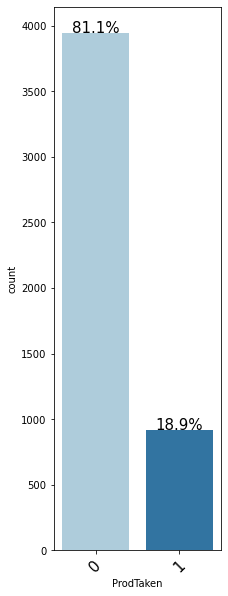

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data=data, feature="ProdTaken", perc=True)

**observations on ProdTaken**

* 19% customers has taken tours packages before
* 81% customers has not taken tour packages 
* data is very skewed towards not taken, we have to handle this while building model to predict decisions correctly

### Check how OwnCar data is distributed

Genrating Bar Plots for feature : OwnCar


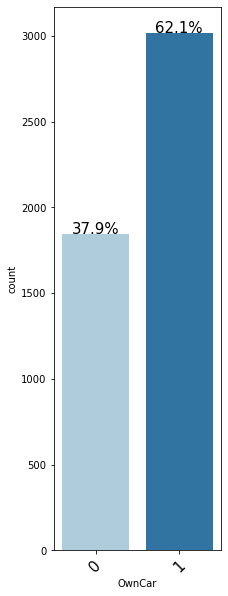

ProdTaken     0    1   All
OwnCar                    
0          1486  359  1845
1          2460  558  3018
All        3946  917  4863
----------------------------------------------------------------------------------------------------


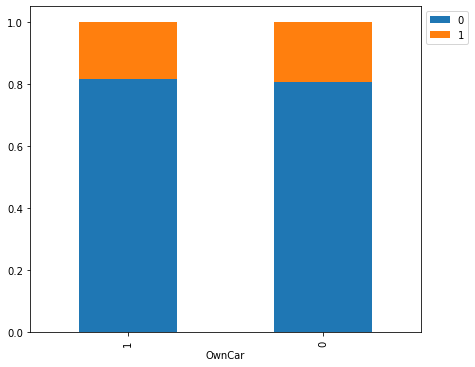

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(data=data, feature="OwnCar", perc=True)
stacked_barplot(data, "OwnCar", "ProdTaken")

**observations on OwnCar**

* 38% customers does not own car
* 62% customers own car
* Owning Car does not impact Target variable based on current data, Approx 20% in both classification has taken tour packages before. 
* we have to check how this feature can help us selling tour packages in later stage

### Check how Passport data is distributed

Genrating Bar Plots for feature : Passport


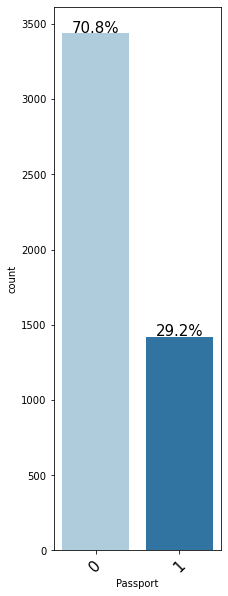

ProdTaken     0    1   All
Passport                  
0          3018  423  3441
1           928  494  1422
All        3946  917  4863
----------------------------------------------------------------------------------------------------


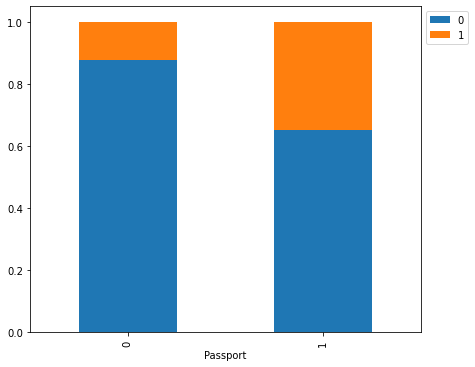

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data=data, feature="Passport", perc=True)
stacked_barplot(data, "Passport", "ProdTaken")

**observations on Passport**

* 71% customers has no passport, we can promote only domestic tour packages
* 29% customers has pasport
* High 35% in customers owning passport has taken tour packages compared ot customers without passports has taken only 16%. 
* we have to check how this feature can help us selling tour packages in later stage

## Checking Numerical Features
### Check how Age data is distributed


Genrating Charts for feature : Age


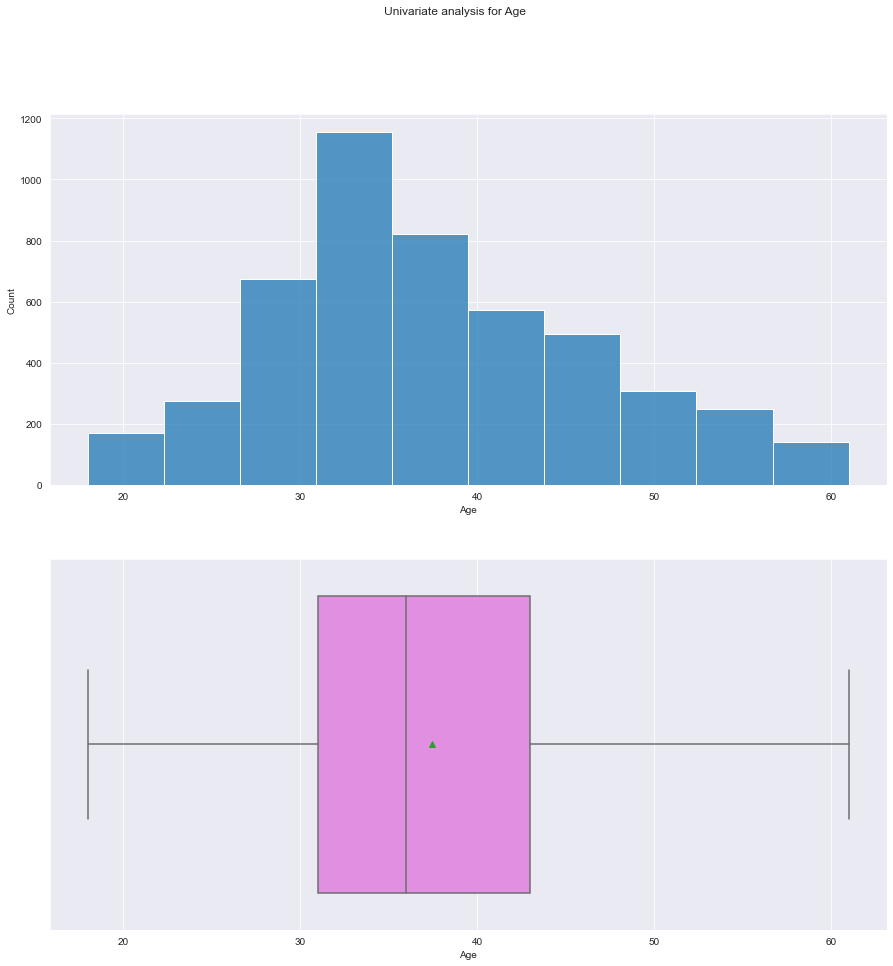

<IPython.core.display.Javascript object>

In [45]:
# with all params
generate_univariate_chart(data=data, feature="Age", hue=None, bins=10, kde=False)

**observations on Age** 

* Age distrubuted normally from 17 to 62, We dont have any outliers on this data.
* We can create Age bins and drop age feature 




### Check how Number Of Trips data is distributed


Genrating Charts for feature : NumberOfTrips


2.0     1474
3.0     1141
1.0      614
4.0      532
5.0      456
6.0      321
7.0      216
8.0      105
20.0       1
19.0       1
22.0       1
21.0       1
Name: NumberOfTrips, dtype: int64

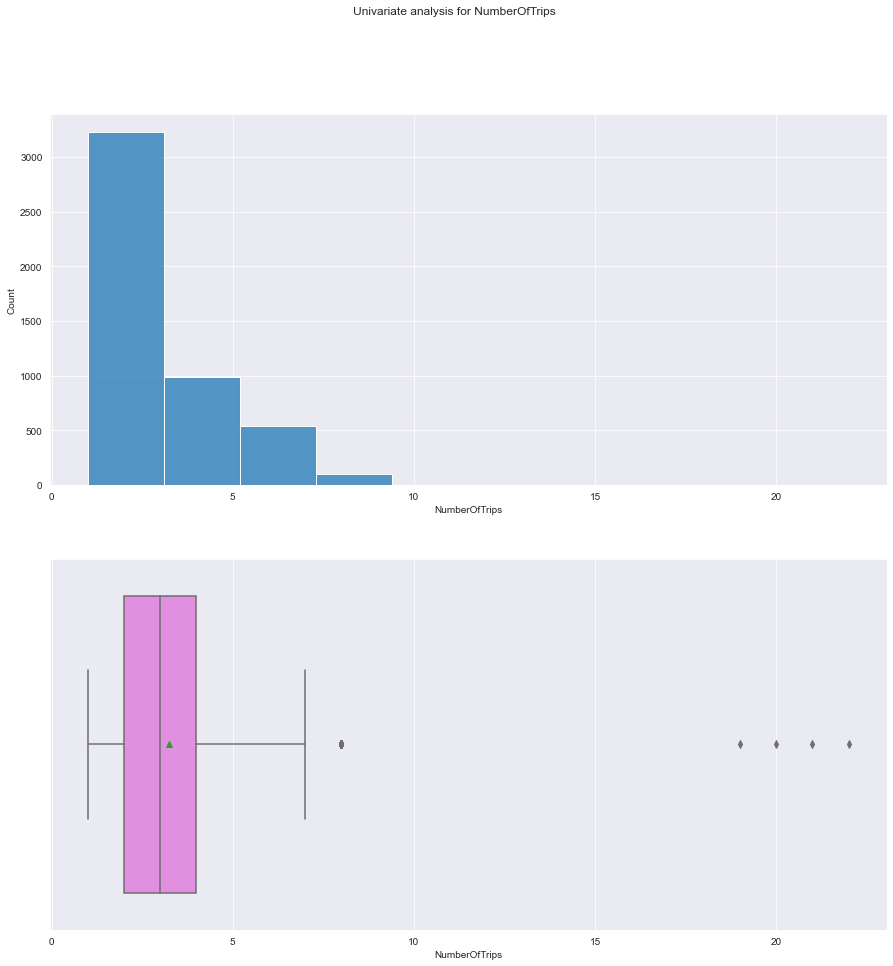

<IPython.core.display.Javascript object>

In [46]:
# with all params
generate_univariate_chart(
    data=data, feature="NumberOfTrips", hue=None, bins=10, kde=False
)
# stacked_barplot(data, "NumberOfTrips", "ProdTaken")
data["NumberOfTrips"].value_counts().sort_values(ascending=False)

In [47]:
data[data["NumberOfTrips"] > 8]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


<IPython.core.display.Javascript object>

**observations on NumberOfTrips** 

* Most customers taking Less than 3 trips, There are some outliers that has more trips 
* there are 4 records that has number of trips more than 8, Seems like outliers. 
* we can replace these outliers with Median values in `outlier treatment`



### Check how Monthly Income data is distributed


Genrating Charts for feature : MonthlyIncome


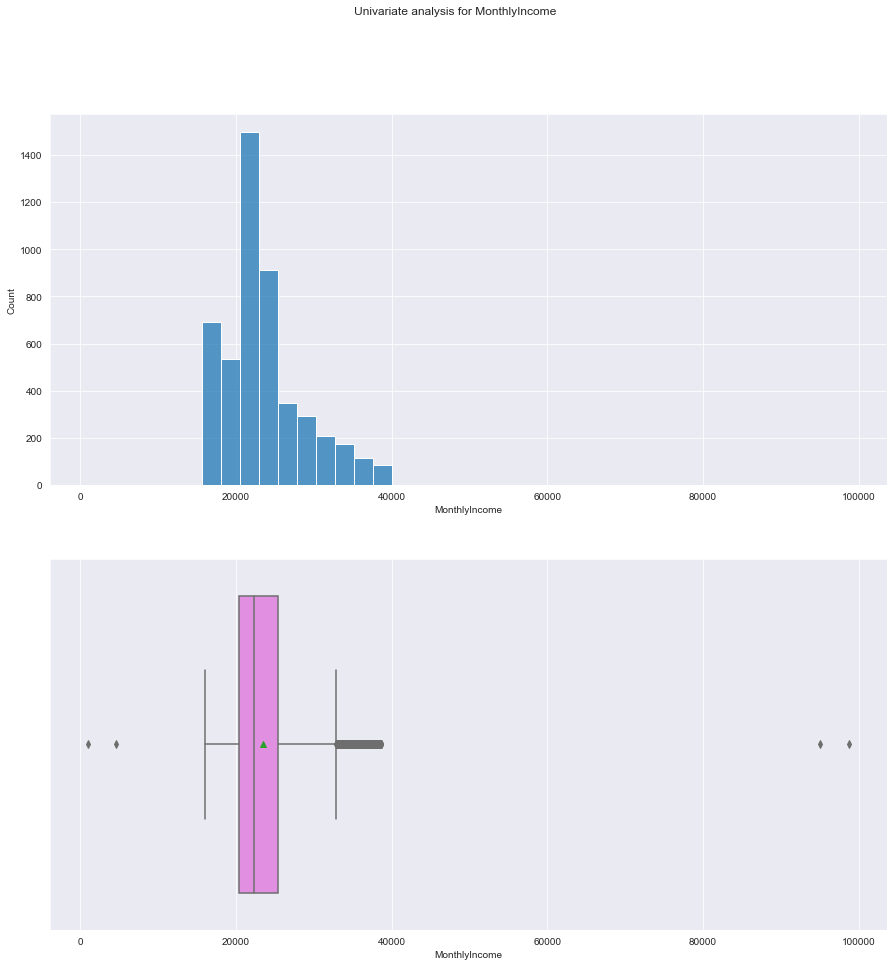

<IPython.core.display.Javascript object>

In [48]:
# with all params
generate_univariate_chart(data=data, feature="MonthlyIncome", hue=None, bins=40, kde=False)


**observations on MonthlyIncome**

* Monthly income data is right skewed with lot of outiers
* mean data fall around 25K, median around 27K and outliers after 35K.
* data requires transformation, We can check which scaling approach to use in data cleaning section 
* 2 customers has extreme outlier income close to 95K to 100K income.




### Check how Number Of Followups data is distributed


Genrating Charts for feature : NumberOfFollowups


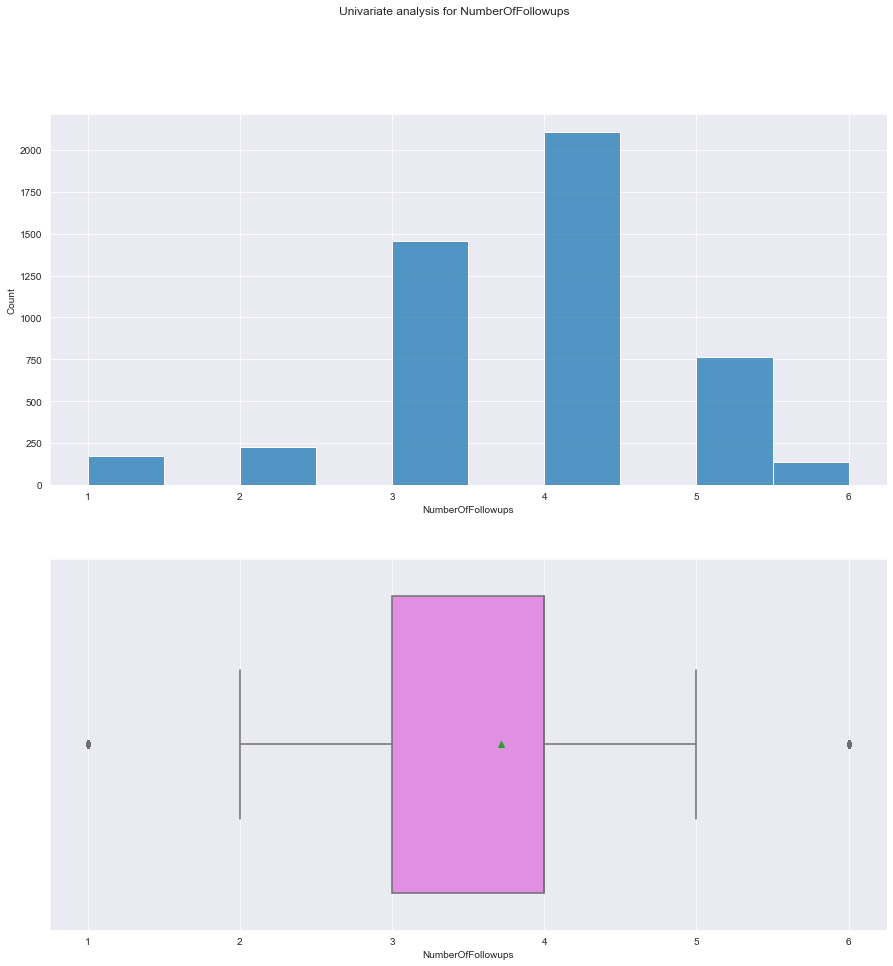

<IPython.core.display.Javascript object>

In [49]:
# with all params
generate_univariate_chart(
    data=data, feature="NumberOfFollowups", hue=None, bins=10, kde=False
)

**observations on NumberOfFollowups** 

* number of followup frequent are 3 to 4. And Median is around 4 and mean around 3.75.
* some outlier data with 1 and 6 followups 


### Check how Duration Of Pitch data is distributed


Genrating Charts for feature : DurationOfPitch


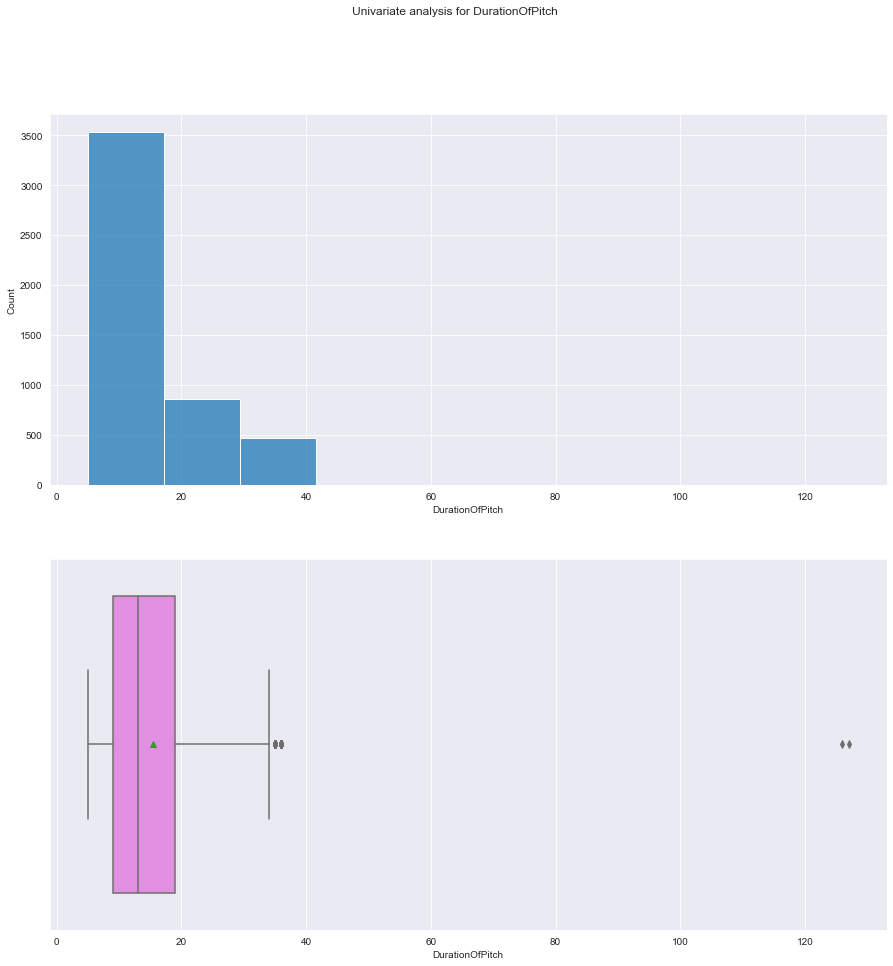

<IPython.core.display.Javascript object>

In [50]:
# with all params
generate_univariate_chart(data=data, feature="DurationOfPitch", hue=None, bins=10, kde=False)


**observations on DurationOfPitch** 

* duration is right skewed data with some outliers beyond 35.
* extreme ouliers around 125 
* data can be fixed in data cleaning section 

## Checking Categorical Columns
### Check how Type of Contact data is distributed


Genrating Bar Plots for feature : TypeofContact


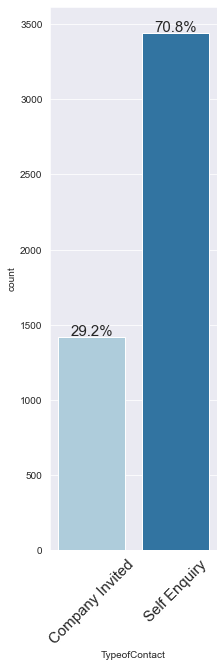

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(data=data, feature="TypeofContact", perc=True)

**observations on TypeofContact** 

* approx 71% of data is self enquiry, 29% data is company invited. 
* only 2 options self enquiry and company invited.


### Check how Occupation data is distributed

Genrating Bar Plots for feature : Occupation


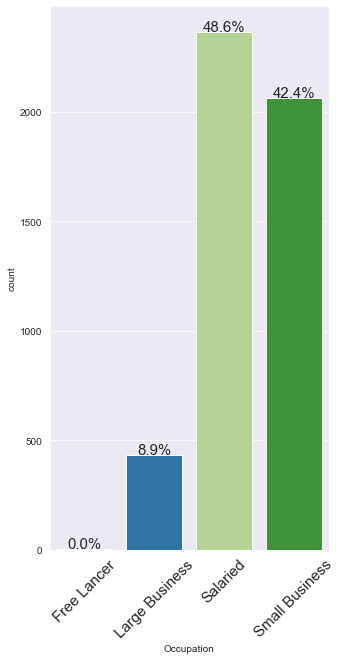

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data=data, feature="Occupation", perc=True)

**observations on Occupation** 

* Most of the customers falls within Salaried 48.6% or Small Business 42.4% type occupation 
* 9% customers are larage business customers 
* very few customers are free lancers 

### Check how Gender data is distributed

Genrating Bar Plots for feature : Gender


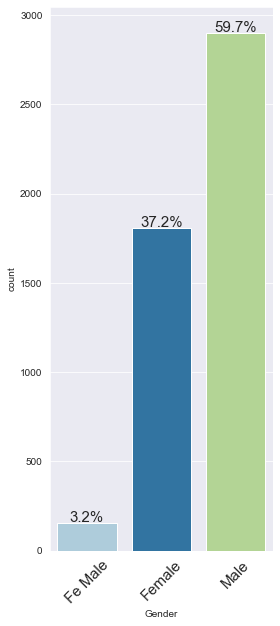

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data=data, feature="Gender", perc=True)

#### lets fix spelling mistake Fe Male to Female - using replace option

Genrating Bar Plots for feature : Gender


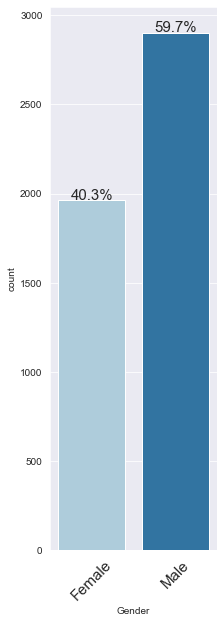

<IPython.core.display.Javascript object>

In [54]:
replaceStruct = {"Gender": {"Fe Male": "Female"}}

data = data.replace(replaceStruct)
labeled_barplot(data=data, feature="Gender", perc=True)

**observations on Gender** 


* 60% customers are male and 40% customers are female.

### Check how Marital Status data is distributed

Genrating Bar Plots for feature : MaritalStatus


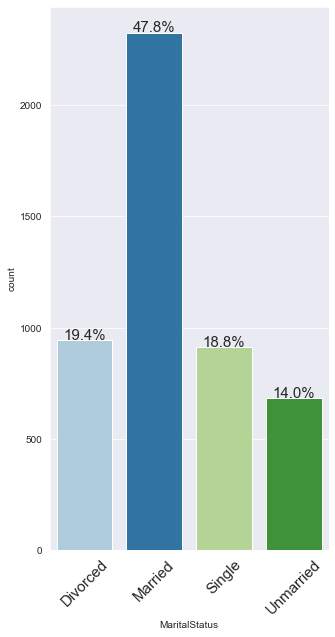

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(data=data, feature="MaritalStatus", perc=True)

**observations on Marital Status** 


* 49% customers are married.
* 19% are single, 14% are unmarried and 19.4% are divorced 
* 4 values are Marital Status types 

### Check how Designation data is distributed

Genrating Bar Plots for feature : Designation


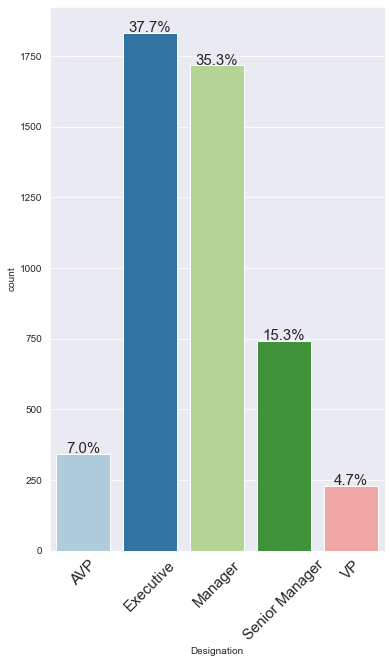

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data=data, feature="Designation", perc=True)

**observations on Designation** 

* 37.7% customers are executive, 35.3% customers are manager, 15.3% customers are senior managers, 7% are assistant VP, 4.7% are VP



### Check how Product Pitched data is distributed

Genrating Bar Plots for feature : ProductPitched


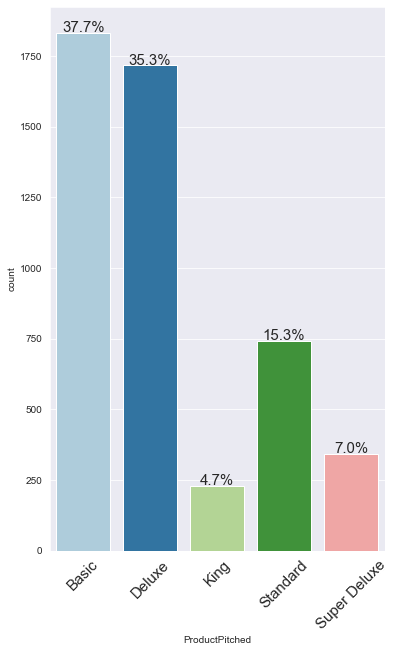

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(data=data, feature="ProductPitched", perc=True)

**observations on ProductPitched** 

* Most common product pitched are basic, 37.7% data 
* 2nd most common are Deluxe type pitch, 35.3% data 
* King 4.7%, Standard 15.3% and Super Deluxe 7.0% are other pitch types 


### Check how City Tier data is distributed

Genrating Bar Plots for feature : CityTier


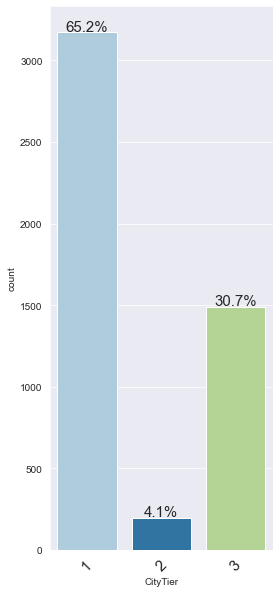

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data=data, feature="CityTier", perc=True)

**observations on City Tier** 

* 65% customers are from Tier 1 City, 31% are tier 3 and 4% customers from Tier 2


### Check how Number Of Person Visiting data is distributed

Genrating Bar Plots for feature : NumberOfPersonVisiting


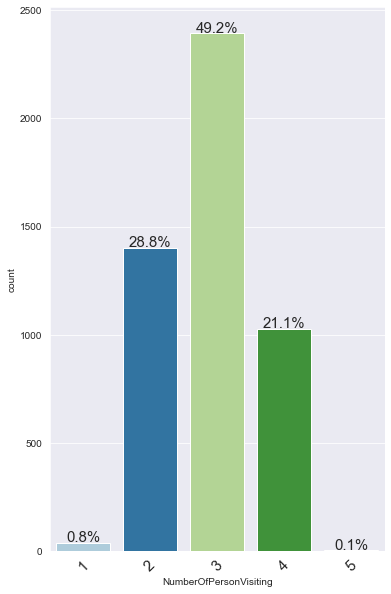

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data=data, feature="NumberOfPersonVisiting", perc=True)

**observations on Number Of Person Visiting** 

* Most common are 3 person visting tour 49.2%
* 2nd common are 29% are 2 person visiting
* 3rd place is 21% 4 person visiting
* 1 and 5 has least contribution 


### Check how Preferred Property Star data is distributed

Genrating Bar Plots for feature : PreferredPropertyStar


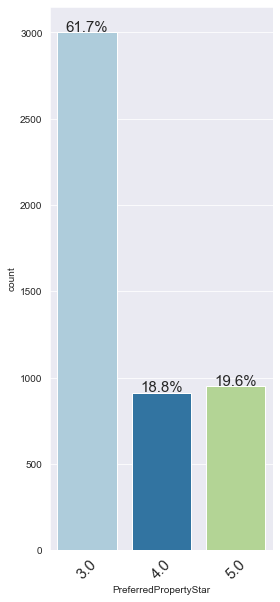

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data=data, feature="PreferredPropertyStar", perc=True)

**observations on Preferred Property Star** 


* most common is 3 star hotels followed by 19% 4 star and 20% 5 star
* we have to check how this star hotels distributed accross designation and income 

### Check how Number Of Children Visiting data is distributed

Genrating Bar Plots for feature : NumberOfChildrenVisiting


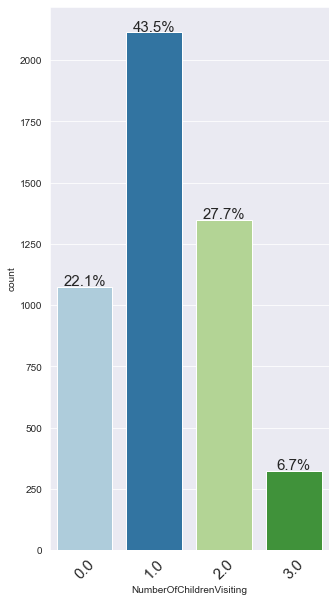

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(data=data, feature="NumberOfChildrenVisiting", perc=True)

**observations on Number Of Children Visiting** 

* 1 child visiting is 43%
* 2 child visiting is 27%
* 0 child visiting is 22% 
* 3 child visting is 6.7% 


### Check how Pitch Satisfaction Score data is distributed

Genrating Bar Plots for feature : PitchSatisfactionScore


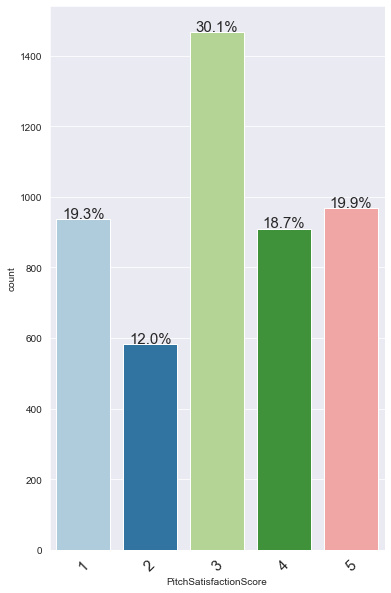

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(data=data, feature="PitchSatisfactionScore", perc=True)

**observations on Pitch Satisfaction Score** 

* most of the customers given 3 star 30%
* approx 40% customers given 4 and 5 stars 
* approx 33% customers given 1 and 2 stars 


## Feature engineering & Data Cleaning

### Feature Engineering - Age to Age Range - Create Bins  - Create Age Bins - Replacement to Age numrical value 

Genrating Bar Plots for feature : AgeRange


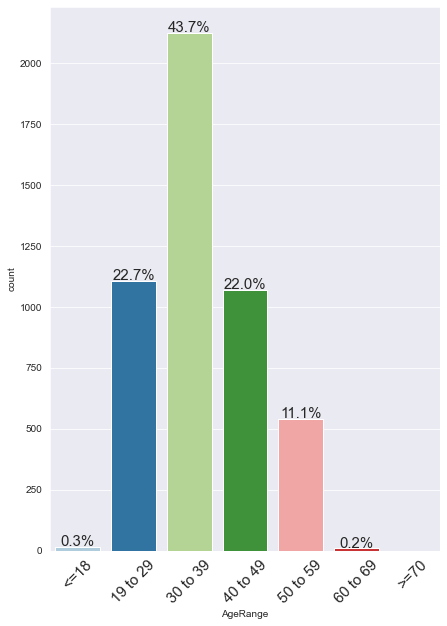

ProdTaken     0    1   All
AgeRange                  
60 to 69      9    0     9
<=18          6    8    14
50 to 59    451   89   540
40 to 49    927  144  1071
19 to 29    769  336  1105
30 to 39   1784  340  2124
All        3946  917  4863
----------------------------------------------------------------------------------------------------


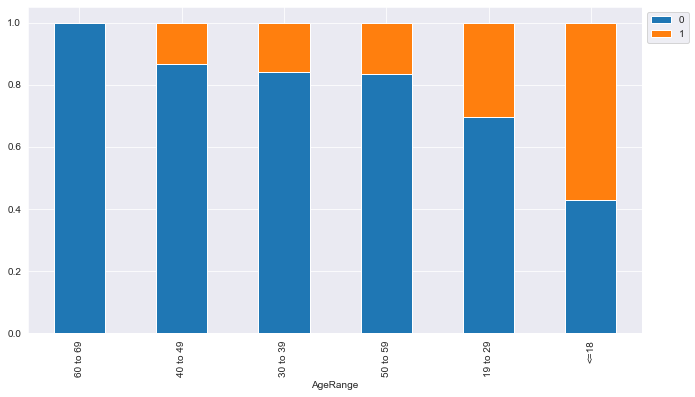

<IPython.core.display.Javascript object>

In [63]:
# Age Ranges
data["AgeRange"] = pd.cut(
    data["Age"],
    [-np.inf, 18, 30, 40, 50, 60, 70, np.inf],
    labels=["<=18", "19 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", ">=70"],
)


# drop age column
data.drop("Age", axis=1, inplace=True)

labeled_barplot(data=data, feature="AgeRange", perc=True)
stacked_barplot(data, "AgeRange", "ProdTaken")

**observations on AgeRange**

* 75% customers are between 19 to 49 range.
* very minimal minors and senior customers 
* when checking age range with target variable we can see high % of <=18 has taken packages, by the volume is very low, otherwise we can see customers age ranges 19 to 59 has taken the packages. 19 to 29 being the highest
* this show age plays major role in selling the package.


## Outlier Treatments & Data Transformation  - Data Pre-processing

### Cheking data falls outside IQR  - 4*IQR Range

In [64]:
 # writing a method that can take a column as input and print all the values falling outside the range of Limts of IQR 
def check_outlier_using_IQR(column, limit=3):
    """
    Check Limts * IQR for each values and prints the ones falls outside the range.
    """
    quartiles = np.quantile(data[column][data[column].notnull()], [0.25, 0.75])
    limit_iqr = limit * (quartiles[1] - quartiles[0])
    outlier = data.loc[np.abs(data[column] - data[column].median()) > limit_iqr, column]
    print();
    print(f"Column : {column} Outlier(s) check");
    print(f"Mean : {data[column].mean()}, Median : {data[column].median()}, Min : {data[column].min()}, Max : {data[column].max()}");
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {limit}*IQR = {limit_iqr}, Total Outlier(s) : {outlier.size} \n")
    print(outlier)
    print("-" * 50)



<IPython.core.display.Javascript object>

In [65]:

# checking all reqd columns for outliers 
cols_to_check = ["DurationOfPitch", "MonthlyIncome", "NumberOfTrips"]
for colname in cols_to_check:  # filter float64 columns
    check_outlier_using_IQR(colname,4)



Column : DurationOfPitch Outlier(s) check
Mean : 15.391116594694633, Median : 13.0, Min : 5.0, Max : 127.0
Q1 = 9.0, Q3 = 19.0, 4*IQR = 40.0, Total Outlier(s) : 2 

1434    126.0
3878    127.0
Name: DurationOfPitch, dtype: float64
--------------------------------------------------

Column : MonthlyIncome Outlier(s) check
Mean : 23552.833641784906, Median : 22380.0, Min : 1000.0, Max : 98678.0
Q1 = 20479.0, Q3 = 25447.5, 4*IQR = 19874.0, Total Outlier(s) : 3 

38      95000.0
142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64
--------------------------------------------------

Column : NumberOfTrips Outlier(s) check
Mean : 3.2393584207279456, Median : 3.0, Min : 1.0, Max : 22.0
Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0, Total Outlier(s) : 4 

385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [66]:
## checking outliers data
data[data["DurationOfPitch"] >= 120.0]


,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeRange
1434,0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0,30 to 39
3878,0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0,50 to 59


<IPython.core.display.Javascript object>

#### Observations on Duration Of Pitch Outliers 



* 2 values has extreme outliers - we can delete this row, Since these 2 customers has not taken product this should not impact 


In [67]:
## Deleting rows with extreme outliers

data.drop(data[data["DurationOfPitch"] >= 120.0].index, inplace=True)

<IPython.core.display.Javascript object>

### Chekcing outliers on income 

In [68]:
## checking outliers data
data[data["MonthlyIncome"] >= 90000]

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeRange
38,0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0,30 to 39
2482,0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0,30 to 39


<IPython.core.display.Javascript object>

In [69]:
## checking outliers data
data[data["MonthlyIncome"] <= 1000]

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeRange
142,0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0,30 to 39


<IPython.core.display.Javascript object>

### Observations on income Outliers 



* 2 values has exterme outliers which has income more than 90K, but they have not taken product, We can delete these 
* 1 value has <1K income, Which seems wrong since the customer has large scale with manager.  but they have not taken product, We can delete these 

In [70]:
## Deleting rows with extreme outliers

data.drop(data[data["MonthlyIncome"] >= 90000].index, inplace=True)
data.drop(data[data["MonthlyIncome"] <= 1000].index, inplace=True)

<IPython.core.display.Javascript object>

### Chekcing outliers on NumberOfTrips 

* NumberOfTrips has 4 outliers which has taken trips more than 19.0

In [71]:
## checking outliers data
data[data["NumberOfTrips"] >= 19]

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeRange
385,1,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0,19 to 29
816,0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,30 to 39
2829,1,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0,30 to 39
3260,0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,30 to 39


<IPython.core.display.Javascript object>

### Observations on NumberOfTrips

* we can delete these 4 records, since its falling outside range of other data

In [72]:
data.drop(data[data["NumberOfTrips"] >= 19].index, inplace=True)

<IPython.core.display.Javascript object>



### Numerical Features -  Checking Data distributions

##### Lets check features with log transformation 


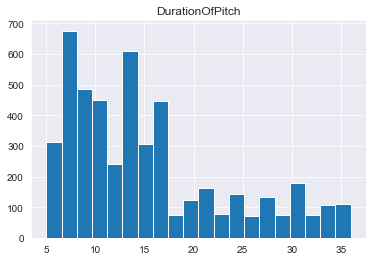

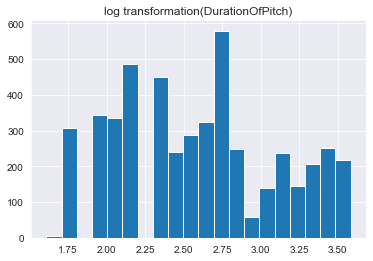

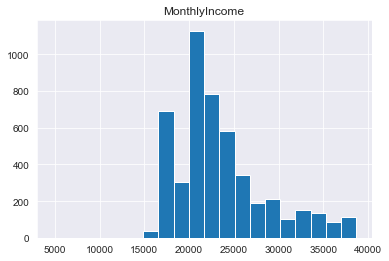

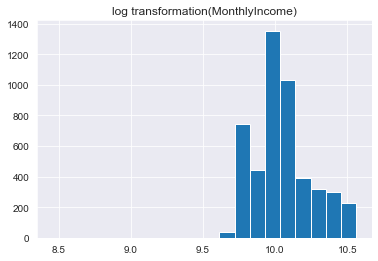

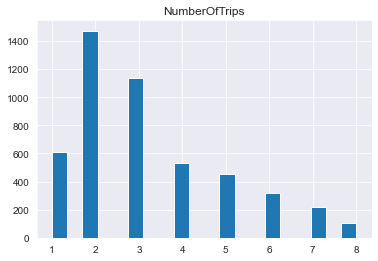

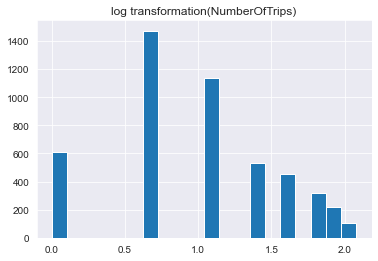

<IPython.core.display.Javascript object>

In [73]:
cols_to_log = ["DurationOfPitch", "MonthlyIncome", "NumberOfTrips"]
for colname in cols_to_log:
    plt.hist(data[colname], bins=20)
    plt.title(colname)
    plt.show()
    plt.hist(np.log(data[colname]), 20)
    plt.title(f'log transformation({colname})')
    plt.show()
 



**observations** 

* log transformation data distribution looks better but not changing significantly, we can leave the data distribution as it is 

## Bivariate Analysis

### Data correlation analysis

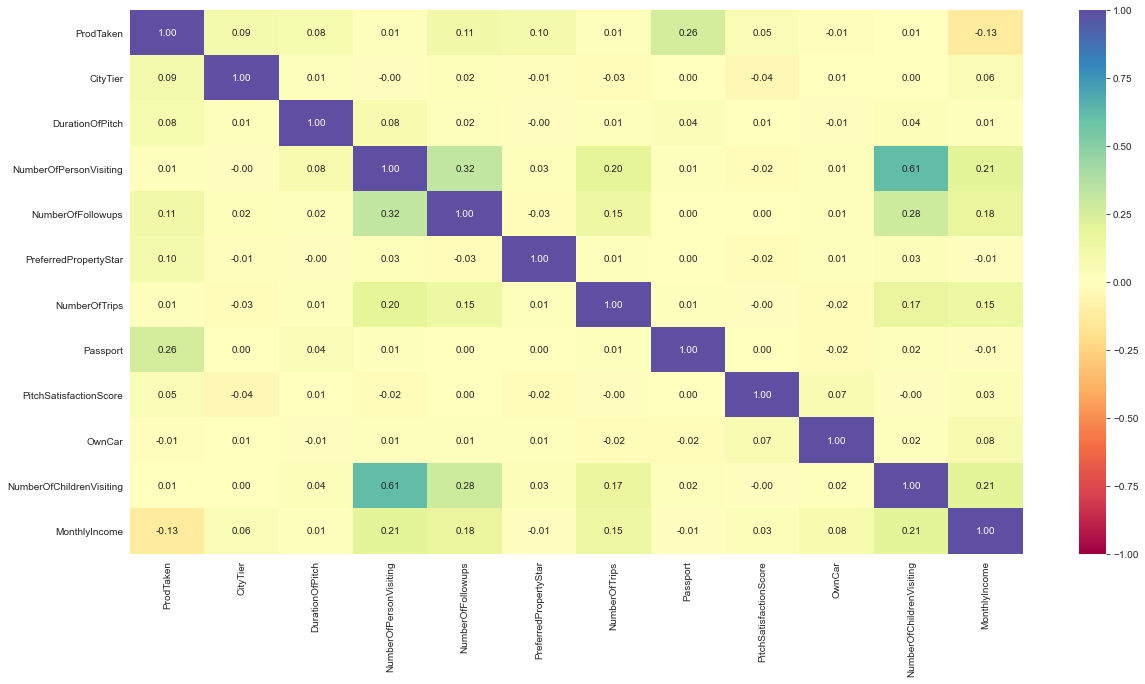

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations on corelations

* Target Variable Product Taken does not have any high relation with other features. High we can see is passport which is also not significant. We see a negative relation with montly income, Expected low income family might not take tour packages. 
* Number of person visiting and children visting has relation. 
* we do not see any other feature relation stronger than .5 

### Pair Plot 

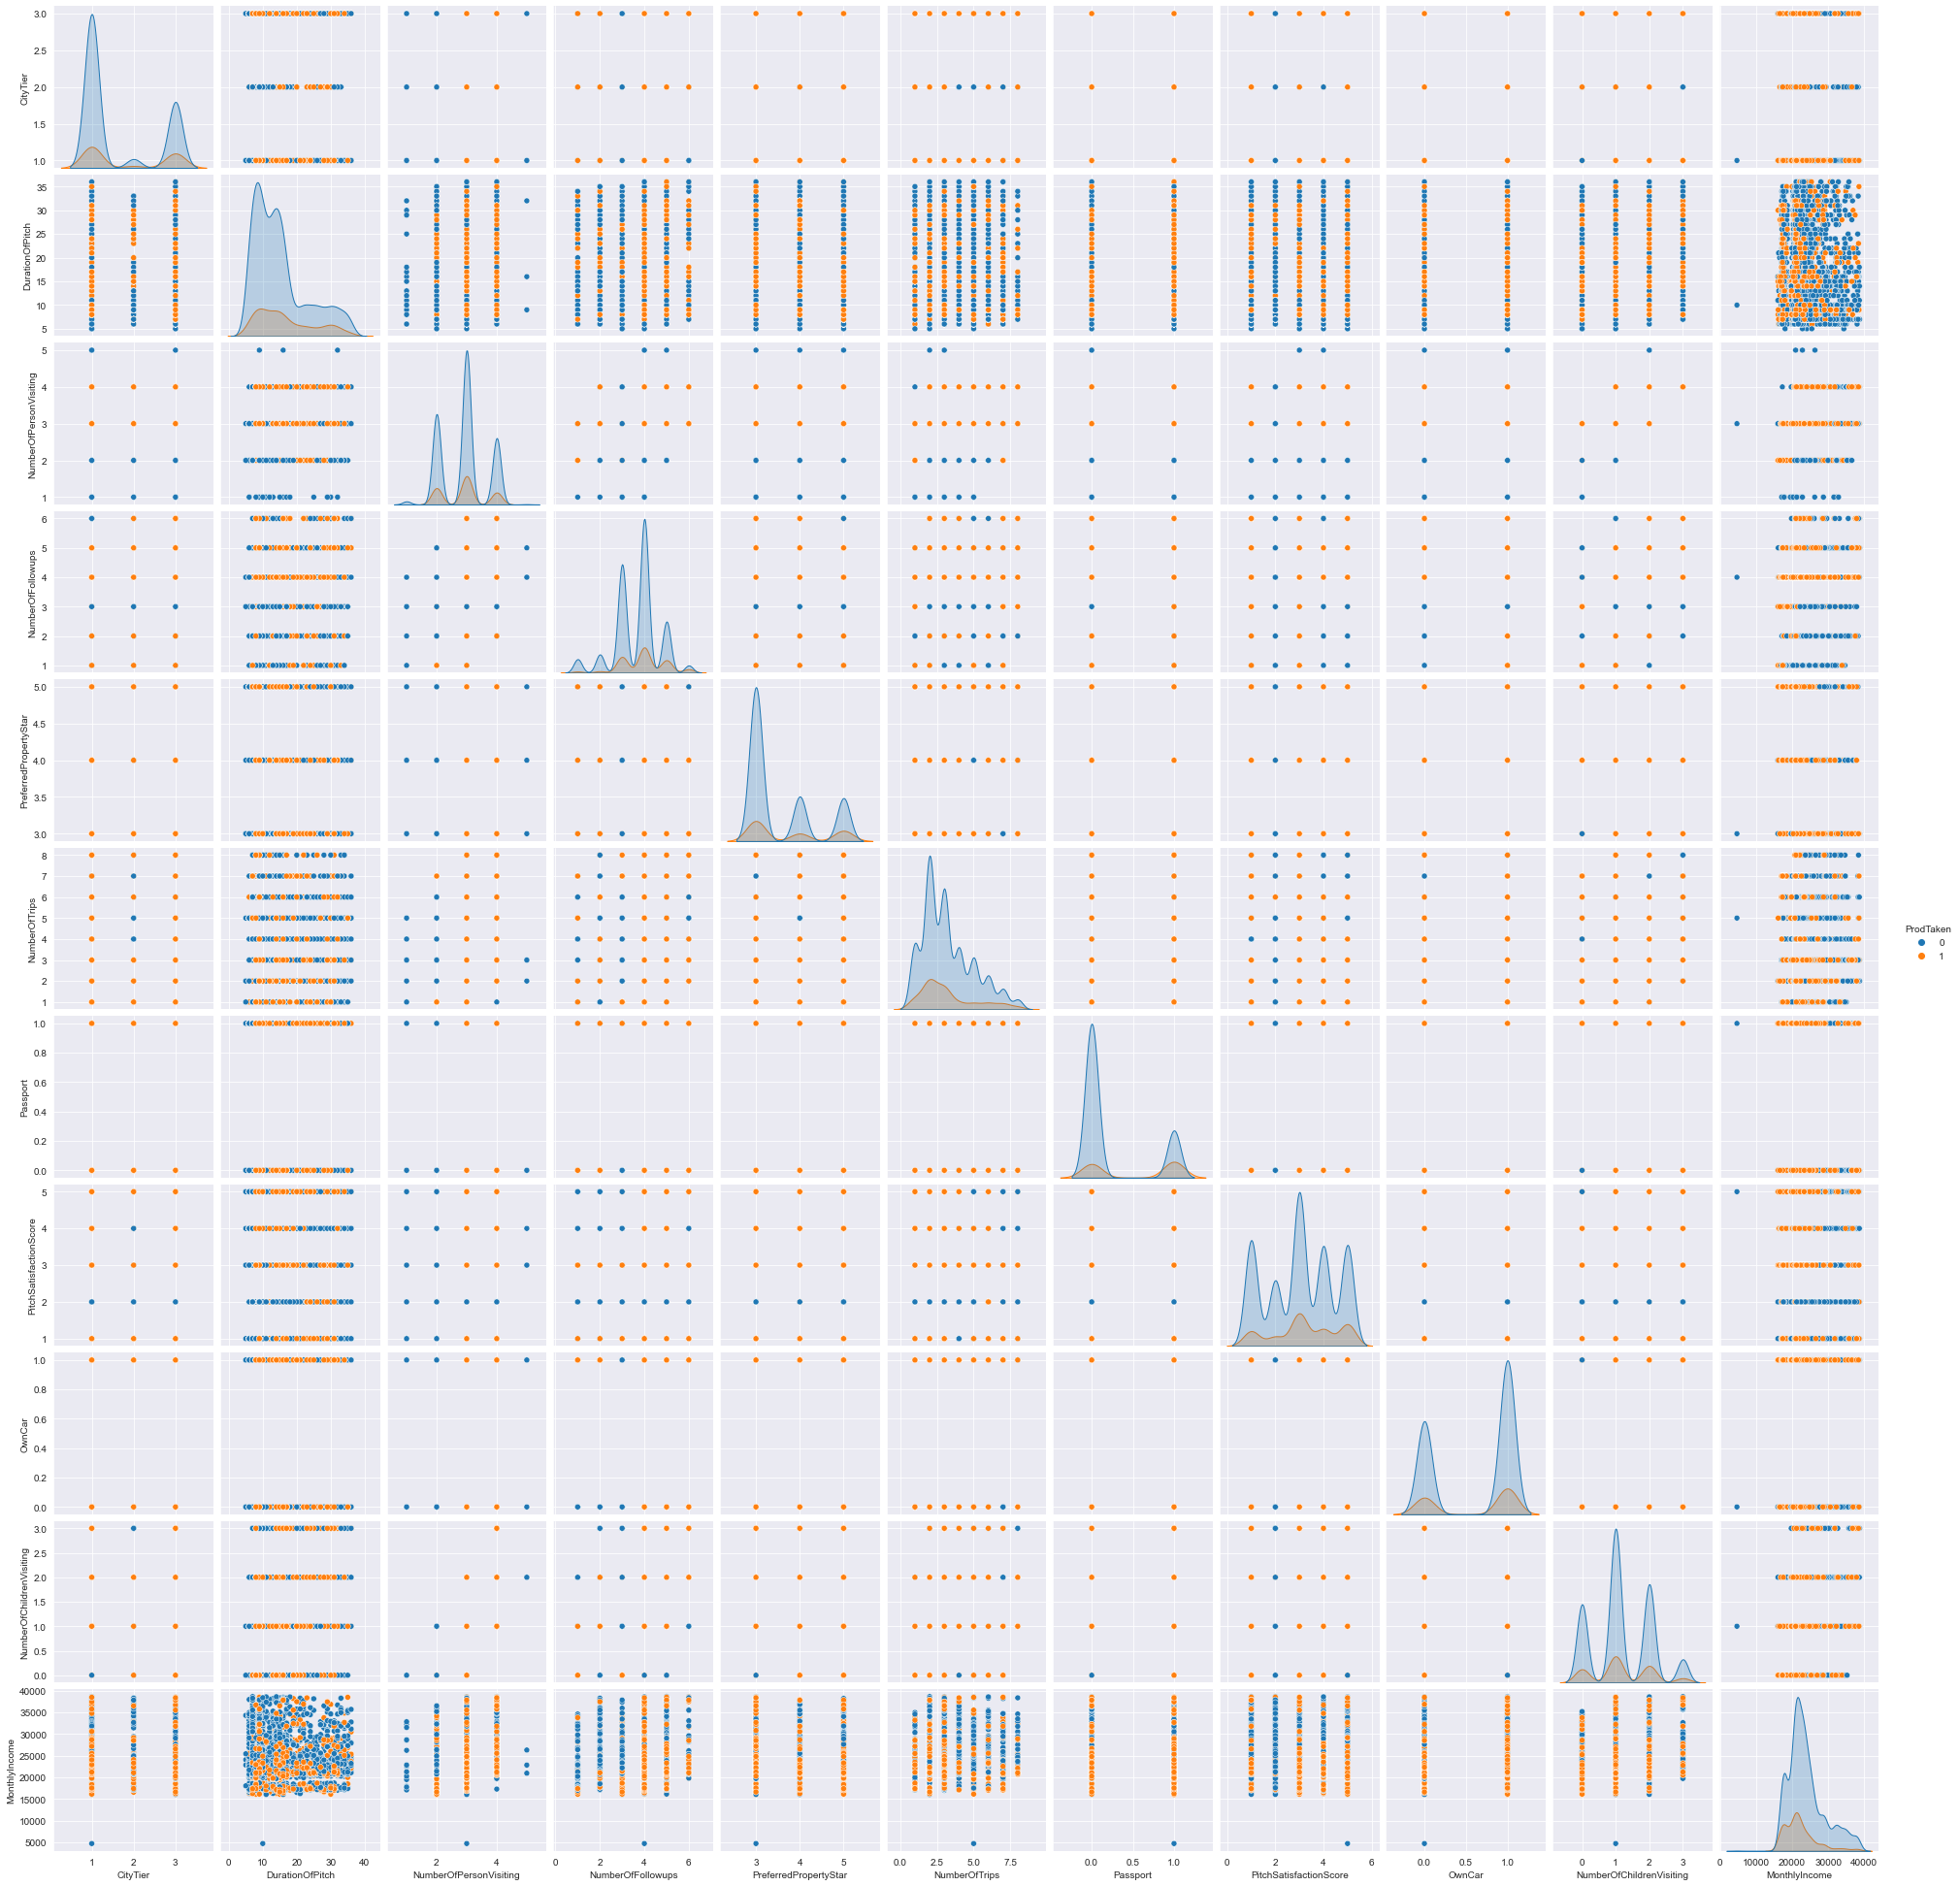

<IPython.core.display.Javascript object>

In [75]:
sns.pairplot(data, hue="ProdTaken")
plt.show()

### Observations on pair plots

* we can see some relation with duration of pitch with income, 
* Number of trips with income and product taken are realted. 
* number of followups with pitch duration and product taken are realted. 
* pitch satisfication score, monthly income and product taken are realted.  

### Checking Target Variable relation with other features 

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1105  308  1413
Self Enquiry     2834  607  3441
All              3939  915  4854
----------------------------------------------------------------------------------------------------


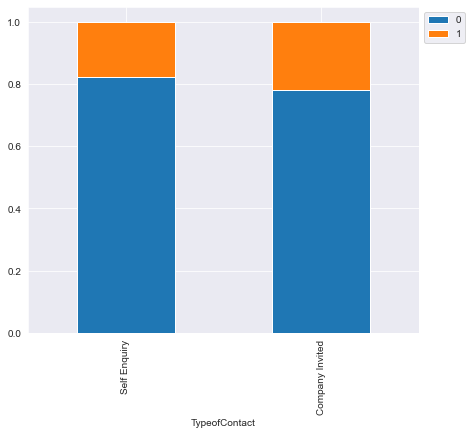

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   313  118   431
Small Business  1682  382  2064
Salaried        1944  413  2357
All             3939  915  4854
----------------------------------------------------------------------------------------------------


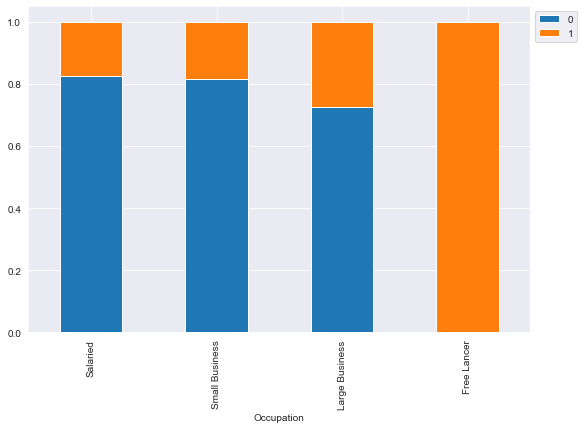

<IPython.core.display.Javascript object>

In [76]:
stacked_barplot(data, "TypeofContact", "ProdTaken")
stacked_barplot(data, "Occupation", "ProdTaken")


#### Observations

* Company contacted has shown more sell compared to self enquiry 
* Large Business customers are taking 25% tour package compared to 18% Salaried and Small Business

ProdTaken     0    1   All
Gender                    
Female     1617  342  1959
Male       2322  573  2895
All        3939  915  4854
----------------------------------------------------------------------------------------------------


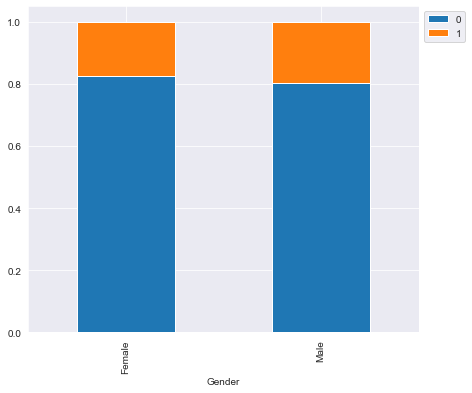

ProdTaken          0    1   All
ProductPitched                 
King             210   20   230
Super Deluxe     322   20   342
Standard         618  124   742
Deluxe          1510  204  1714
Basic           1279  547  1826
All             3939  915  4854
----------------------------------------------------------------------------------------------------


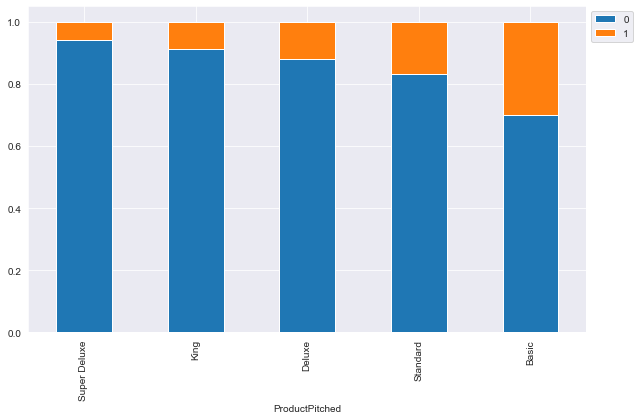

<IPython.core.display.Javascript object>

In [77]:
stacked_barplot(data, "Gender", "ProdTaken")
stacked_barplot(data, "ProductPitched", "ProdTaken")


#### Observations
* we do not see any difference in product taken, Both male and female has taken approx 20% product. 
* Customers are intrested in basic, standard and deluxe package. those are top selling. 

ProdTaken         0    1   All
MaritalStatus                 
Divorced        819  123   942
Unmarried       514  166   680
Single          609  300   909
Married        1997  326  2323
All            3939  915  4854
----------------------------------------------------------------------------------------------------


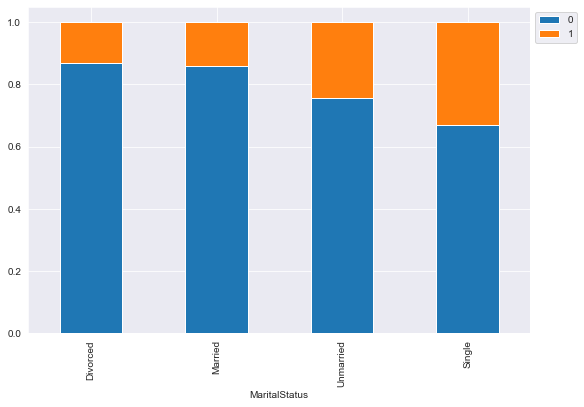

ProdTaken     0    1   All
Passport                  
0          3014  423  3437
1           925  492  1417
All        3939  915  4854
----------------------------------------------------------------------------------------------------


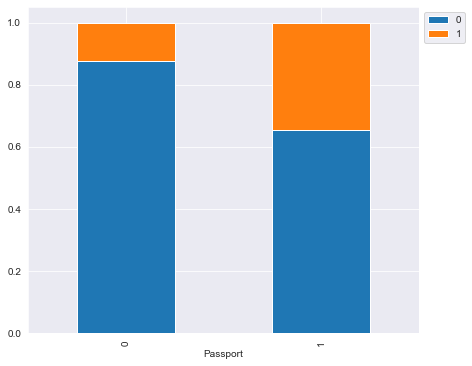

<IPython.core.display.Javascript object>

In [78]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")
stacked_barplot(data, "Passport", "ProdTaken")


#### Observations

* Single and Unmarried has taken product more compared to married or divorced. 37% single taken product, 22% unmarried has taken product. 16% both divorced and married has taken product
* customers with passport has taken product more than customers without passport.



ProdTaken                  0    1   All
PitchSatisfactionScore                 
2                        491   88   579
1                        792  143   935
4                        748  160   908
5                        756  210   966
3                       1152  314  1466
All                     3939  915  4854
----------------------------------------------------------------------------------------------------


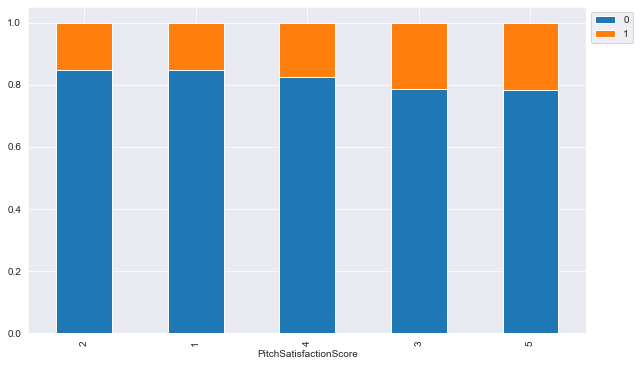

ProdTaken     0    1   All
OwnCar                    
0          1485  359  1844
1          2454  556  3010
All        3939  915  4854
----------------------------------------------------------------------------------------------------


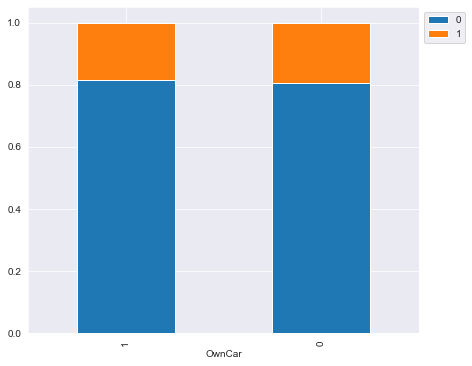

<IPython.core.display.Javascript object>

In [79]:
stacked_barplot(data, "PitchSatisfactionScore", "ProdTaken")
stacked_barplot(data, "OwnCar", "ProdTaken")

#### Observations

* there is no clear relation with owning a car and took product. Both has share of 20% product ProdTaken
* statisfication score 3 and above are taken more by customers 

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
VP               210   20   230
Senior Manager   618  124   742
Manager         1510  204  1714
Executive       1279  547  1826
All             3939  915  4854
----------------------------------------------------------------------------------------------------


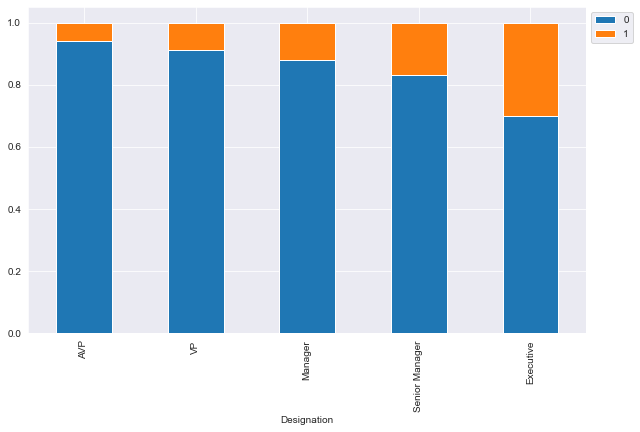

ProdTaken     0    1   All
AgeRange                  
60 to 69      9    0     9
<=18          6    8    14
50 to 59    450   89   539
40 to 49    927  144  1071
19 to 29    769  335  1104
30 to 39   1778  339  2117
All        3939  915  4854
----------------------------------------------------------------------------------------------------


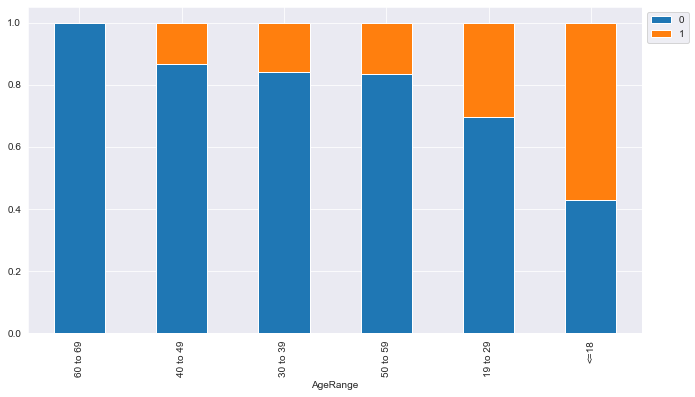

<IPython.core.display.Javascript object>

In [80]:
stacked_barplot(data, "Designation", "ProdTaken")
stacked_barplot(data, "AgeRange", "ProdTaken")

#### Observations
* manager, senior manager and executive are the ones took more product compared to AVP and VP 
* exeuctive taken 30% product. 
* Age 19 to 59 has 99% of customers 
* 19 to 29 group has taken 30% product compared to other age group, Company should target more on this age group.
* all other age group approx 12% to 18% taken product.


### Checking Target Variable relation with Numerical Features 

#### MonthlyIncome vs ProdTaken

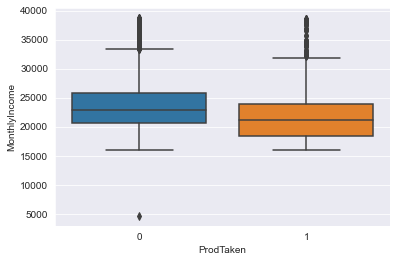

<IPython.core.display.Javascript object>

In [81]:
sns.boxplot(data["ProdTaken"], data["MonthlyIncome"])
plt.show()

#### Observations

* no clear indication of montly income with product sold. Customer with income 20K to 25K amd upto 33K are most of the customers bought product

#### NumberOfTrips vs ProdTaken

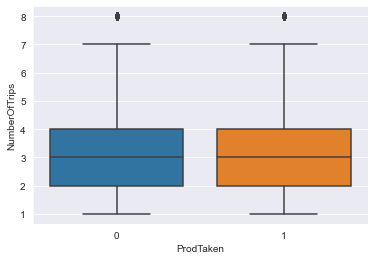

<IPython.core.display.Javascript object>

In [82]:
sns.boxplot(data["ProdTaken"], data["NumberOfTrips"])
plt.show()

#### Observations

* no clear indication of number of trips taken with prod taken, most of the prod taken are customer took 2 to 4 trips

#### DurationOfPitch vs ProdTaken

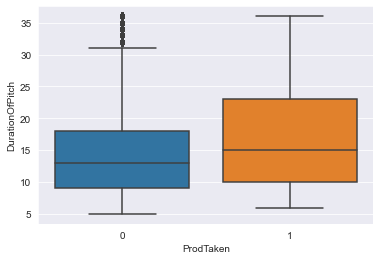

<IPython.core.display.Javascript object>

In [83]:
sns.boxplot(data["ProdTaken"], data["DurationOfPitch"])
plt.show()

#### Observations

* customers like package with 10 to 24 days, compared to other durations.

#### NumberOfFollowups vs ProdTaken

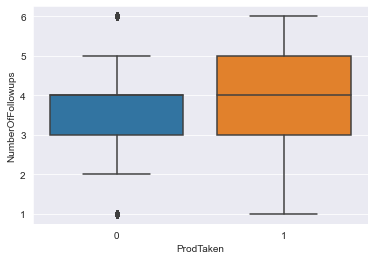

<IPython.core.display.Javascript object>

In [84]:
sns.boxplot(data["ProdTaken"], data["NumberOfFollowups"])
plt.show()

#### Observations

* More followup sells more product. 3 to 5 followup sells most of the product.

#### NumberOfChildrenVisiting vs ProdTaken

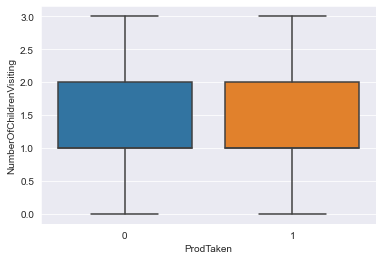

<IPython.core.display.Javascript object>

In [85]:
sns.boxplot(data["ProdTaken"], data["NumberOfChildrenVisiting"])
plt.show()

#### Observations

* No Clear relation with product sold for number of children visit

#### PreferredPropertyStar vs ProdTaken


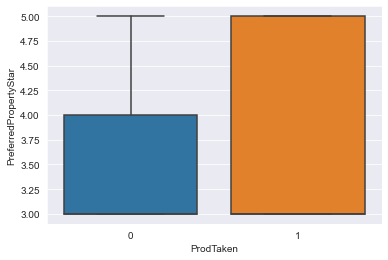

<IPython.core.display.Javascript object>

In [86]:
sns.boxplot(data["ProdTaken"], data["PreferredPropertyStar"])
plt.show()

#### Observations

* Packages with 3 to 5 stars sold more. 

#### NumberOfPersonVisiting vs ProdTaken

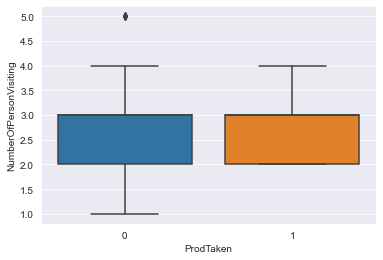

<IPython.core.display.Javascript object>

In [87]:
sns.boxplot(data["ProdTaken"], data["NumberOfPersonVisiting"])
plt.show()

#### Observations

* 2 to 3 visitors bought more product.

#### CityTier vs ProdTaken


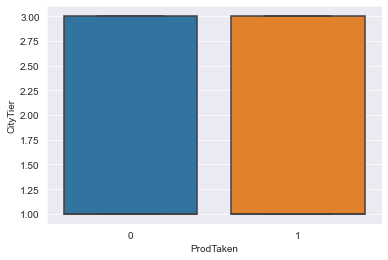

<IPython.core.display.Javascript object>

In [88]:
sns.boxplot(data["ProdTaken"], data["CityTier"])
plt.show()

#### Observations

* No Clear relation with product sold for city tier


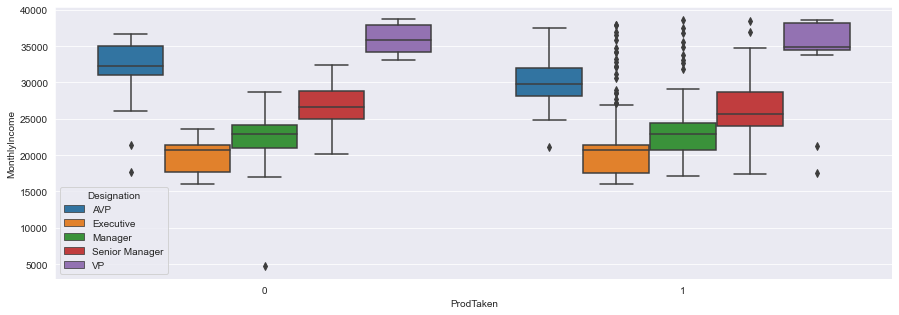

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 5))
sns.boxplot(data["ProdTaken"], data["MonthlyIncome"], hue=data["Designation"])
plt.show()

#### Observations

* 37.7% customers are executive, 35.3% customers are manager, 15.3% customers are senior managers, 7% are assistant VP, 4.7% are VP
* manager, senior manager and executive are the ones took more product compared to AVP and VP 
* exeuctive taken 30% product, Followed by managers and senior managers 

#### Monthly Income vs  NumberOfPersonVisiting with ProdTaken

Genrating Charts for feature x : MonthlyIncome, y : NumberOfPersonVisiting


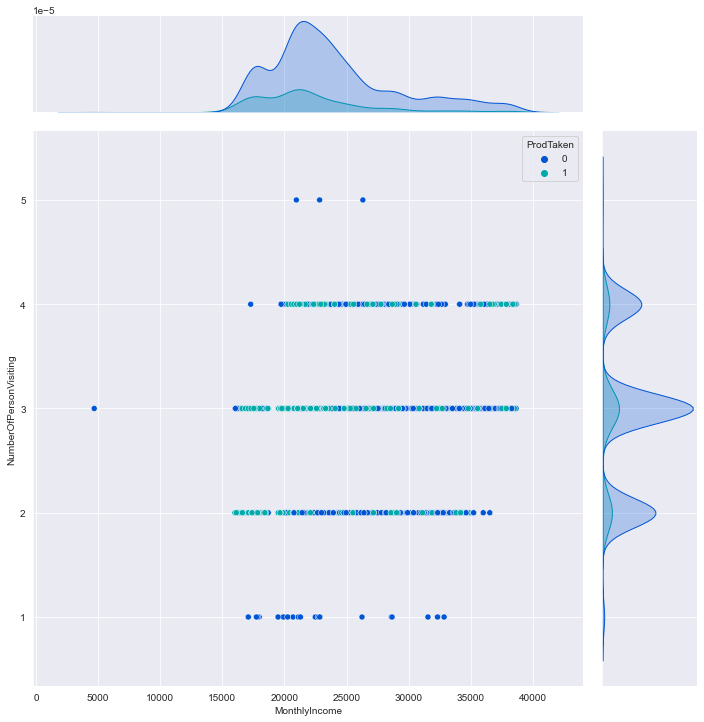

<IPython.core.display.Javascript object>

In [90]:
generate_bivariate_chart(
    xfeature="MonthlyIncome",
    yfeature="NumberOfPersonVisiting",
    data=data,
    hue="ProdTaken",
)

#### Observations

* 2 to 4 people visting with income rnage 20K to 30K took product more than other income range and persons visiting

#### Monthly Income vs  DurationOfPitch with ProdTaken

Genrating Charts for feature x : MonthlyIncome, y : DurationOfPitch


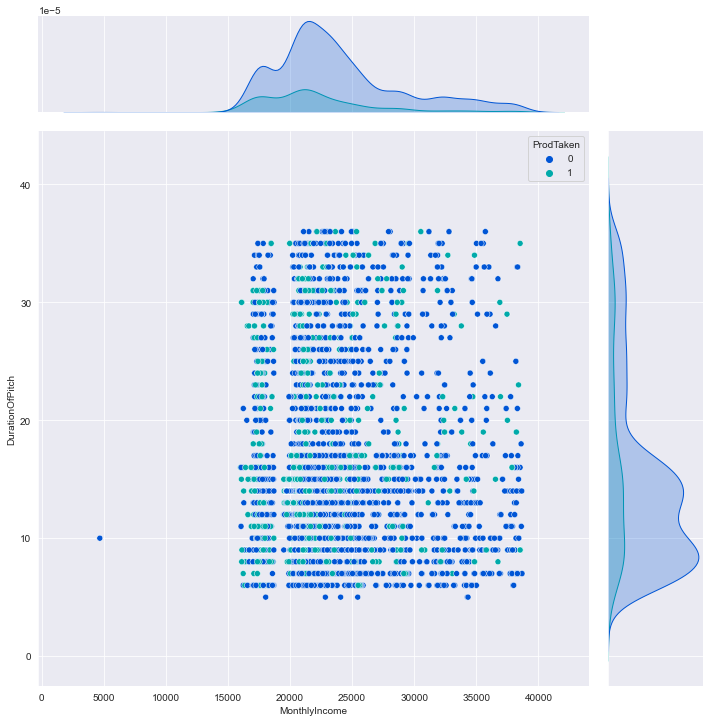

<IPython.core.display.Javascript object>

In [91]:
generate_bivariate_chart(
    xfeature="MonthlyIncome", yfeature="DurationOfPitch", data=data, hue="ProdTaken",
)

#### Observations

* No clear relation. But product taken more with 20 to 30K with duration 12 to 24 days
#### Monthly Income vs  NumberOfTrips with ProdTaken

Genrating Charts for feature x : MonthlyIncome, y : NumberOfTrips


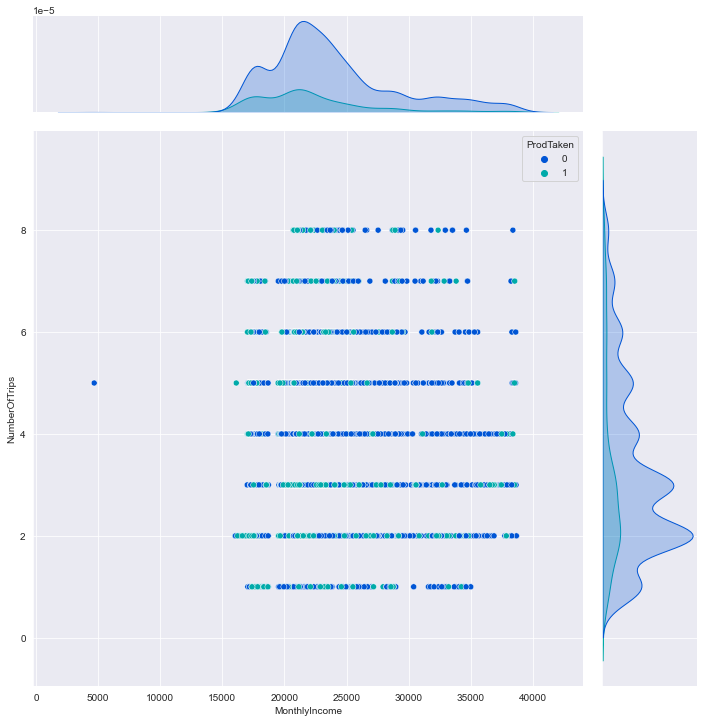

<IPython.core.display.Javascript object>

In [92]:
generate_bivariate_chart(
    xfeature="MonthlyIncome", yfeature="NumberOfTrips", data=data, hue="ProdTaken",
)

#### Observations

* 2 to 4 trips with income range 20K to 35K took more product compared to others 

#### Monthly Income vs  NumberOfFollowups with ProdTaken

Genrating Charts for feature x : MonthlyIncome, y : NumberOfFollowups


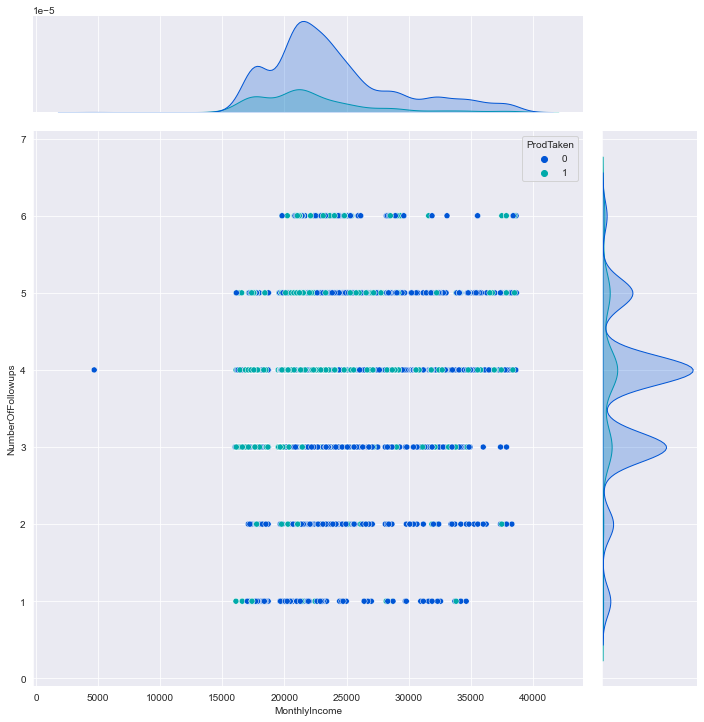

<IPython.core.display.Javascript object>

In [93]:
generate_bivariate_chart(
    xfeature="MonthlyIncome", yfeature="NumberOfFollowups", data=data, hue="ProdTaken",
)

#### Observations

* we see 3 to 6 followup sold more product comapred to less followups. 

#### Monthly Income vs  PreferredPropertyStar with ProdTaken

Genrating Charts for feature x : MonthlyIncome, y : PreferredPropertyStar


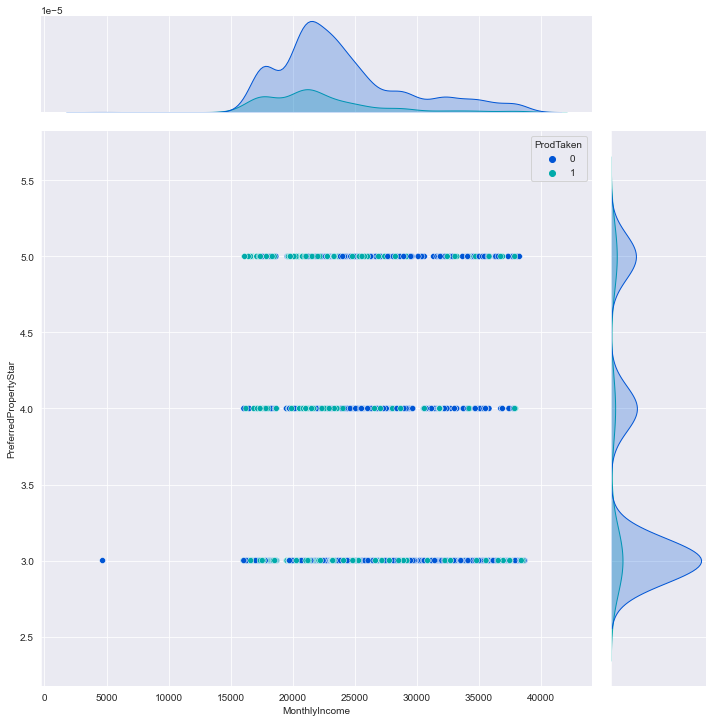

<IPython.core.display.Javascript object>

In [94]:
generate_bivariate_chart(
    xfeature="MonthlyIncome",
    yfeature="PreferredPropertyStar",
    data=data,
    hue="ProdTaken",
)

#### Observations

* customers like 3 to 5 stars no clear relation

## Data Post Cleanup/Outlier Treatment & Feature Engineering

#### Understand the shape of the dataset.

In [95]:
data.shape

(4854, 19)

<IPython.core.display.Javascript object>

**observations on data** 

* Given dataset has 4854 rows and 19 columns
* ProdTaken is dependent target variable.

### Check the data types of the columns in the dataset.

checking data types of all columns 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4854 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4854 non-null   int64   
 1   TypeofContact             4854 non-null   category
 2   CityTier                  4854 non-null   int64   
 3   DurationOfPitch           4854 non-null   float64 
 4   Occupation                4854 non-null   category
 5   Gender                    4854 non-null   category
 6   NumberOfPersonVisiting    4854 non-null   int64   
 7   NumberOfFollowups         4854 non-null   float64 
 8   ProductPitched            4854 non-null   category
 9   PreferredPropertyStar     4854 non-null   float64 
 10  MaritalStatus             4854 non-null   category
 11  NumberOfTrips             4854 non-null   float64 
 12  Passport                  4854 non-null   int64   
 13  PitchSatisfactionScore    4854 non-null   int64 

<IPython.core.display.Javascript object>

### Summary of the data


In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4854.0,0.188504,0.391155,0.0,0.0,0.0,0.0,1.0
CityTier,4854.0,1.654718,0.916604,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4854.0,15.350227,8.030960,5.0,9.0,13.0,19.0,36.0
NumberOfPersonVisiting,4854.0,2.908529,0.724791,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4854.0,3.713432,0.997047,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4854.0,3.578904,0.797079,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4854.0,3.225587,1.758204,1.0,2.0,3.0,4.0,8.0
Passport,4854.0,0.291924,0.454694,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4854.0,3.080552,1.366303,1.0,2.0,3.0,4.0,5.0
OwnCar,4854.0,0.620107,0.485410,0.0,0.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [98]:
data.describe(include="category").T

,count,unique,top,freq
TypeofContact,4854,2,Self Enquiry,3441
Occupation,4854,4,Salaried,2357
Gender,4854,2,Male,2895
ProductPitched,4854,5,Basic,1826
MaritalStatus,4854,4,Married,2323
Designation,4854,5,Executive,1826
AgeRange,4854,6,30 to 39,2117


<IPython.core.display.Javascript object>


* ProdTaken is target variable and 18 other independent features.
* 7 Category features others are numerical features 
* we dont have outliers when we check summary 


##  Insights based on EDA 

### Summary Missing Value/Outlier/Feature Engineering Treatments

* All Missing Values treated with with Median Imputation, Rows that cannot be treated has been dropped. 
* All Outliers are treated. Current data has no outliers, All Outliers Exceeds 4 IQR has been dropped.
* Age has been Convered to Age Bins to consolidate similar age group customers 



#### ProdTaken
* ProdTaken is dependent target variable.
* imbalance in data spread, we have 81% customers did not took product and 19% customers took. 
* we have to adjust this imbalance when buidling model to give more weightage to customers took product.
* Target Variable Product Taken does not have any high relation with other features. High we can see is passport which is also not significant. We see a negative relation with montly income, Expected low income family might not take tour packages. 

#### OwnCar
* Majority customers own car - 62%, only 38% does not have a car.
* there is no clear relation with owning a car and took product. Both has share of 20% product ProdTaken

#### Passport

* only 29% has passport, Others dont have.
* But we see a trend customers has passport like to take tour packages. 37% customers has passport took product. Only 15% customers does not have passport took product.
* Company can focus more on customers with passport to sell their package.

#### Age - Convered to AgeRange

* Majority customers falls within 30 to 39 range.
* Age 19 to 59 has 99% of customers 
* 19 to 29 group has taken 30% product compared to other age group, Company should target more on this age group.
* all other age group approx 12% to 18% taken product.


#### Number Of Trips
* more than 90% of customers took less than 5 trips a year. Company can target customers took less trips that year to sell their tour package.  
* no clear indication of number of trips taken with prod taken, most of the prod taken are customer took 2 to 4 trips 

#### Monthly Income
* no clear indication of montly income with product sold. Customer with income 20K to 25K amd upto 33K are most of the customers bought product. Company should target with this income range.


#### Number Of Followups
* More followup sells more product. 3 to 5 followup sells most of the product.
* Company should followup atlest 3 to 5 times every customer to increase product sales 

#### Duration Of Pitch 
* customers like package with 10 to 24 days, compared to other durations. Company should promote these packages more.

#### Type of Contact

* 71% are self enquiry, Only 29% company invited.
* Company should focus more on this area to reach more customers.
* Company Invite shows little higher % sale in product taken compared to self enuiry 

#### Occupation

* 90% of customers are Salaried or Small Business, They Each contribute 18% product taken
* Large Business customers are taking 25% tour package compared to 18% Salaried and Small Business


#### Gender

* 60% customers are male and 40% customers are female.
* we do not see any difference in product taken, Both male and female has taken approx 20% product. 

#### Marital Status

* 49% customers are married. 19% are single, 14% are unmarried and 19.4% are divorced 
* Single and Unmarried has taken product more compared to married or divorced. 37% single taken product, 22% unmarried has taken product. 16% both divorced and married has taken product

#### Designation

* 37.7% customers are executive, 35.3% customers are manager, 15.3% customers are senior managers, 7% are assistant VP, 4.7% are VP
* manager, senior manager and executive are the ones took more product compared to AVP and VP 
* exeuctive taken 30% product, Followed by managers and senior managers 
* Company should target these desgination more to sell thier product.


#### Product Pitched

* Most of the customers are intrested in basic and deluxe  basic with 37.7% and deluxe with 35.3%.
* Company can target customer based on their income level with tour pitch packages
* King & Super deluxe can be reached to VP & AVP level customers
* Customers are intrested in basic, standard and deluxe package. those are top selling. 


#### City Tier

* 65% customers are from Tier 1 City, 31% are tier 3 and 4% customers from Tier 2
* No Clear relation with product sold for city tier

#### Number Of Person Visiting

* Most common are 3 person visting tour 49.2%, 2nd common are 29% are 2 person visiting
* Company can reach customers with small families to sell thier product.
* 2 to 3 visitors bought more product. 

#### Preferred Property Star

* most common is 3 star hotels followed by 19% 4 star and 20% 5 star
* Packages with 3 to 5 stars sold more. Company should try to include 4 and 5 star more to improve sales

#### Number Of Children Visiting

* 1 child visiting is 43%,  2 child visiting is 27%
* Company can reach customers with small families to sell thier product.
* No Clear relation with product sold for number of children visit

#### Pitch Satisfaction Score

* most of the customers given 3 star 30%
* approx 40% customers given 4 and 5 stars 
* target the tour package has 3 stars and more and sell those to customers, they likey to buy those products


#### Monthly Income vs  NumberOfPersonVisiting with ProdTaken

* 2 to 4 people visting with income rnage 20K to 30K took product more than other income range and persons visiting. Company should target this type of customer to improve sales.

#### Monthly Income vs  DurationOfPitch with ProdTaken

* Income with 20k to 30K with duration 12 to 24 days are most sold, Company should target this type of customer to improve sales.

#### Monthly Income vs  NumberOfTrips with ProdTaken

* 2 to 4 trips with income range 20K to 35K took more product compared to others , Company should target this type of customer to improve sales.

#### Monthly Income vs  NumberOfFollowups with ProdTaken
* we see 3 to 6 followup sold more product comapred to less followups, Company should target this type of customer to improve sales.

#### Monthly Income vs  PreferredPropertyStar with ProdTaken

* customers like 3 to 5 stars no clear relation




## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

*  `stratify` parameter in the train_test_split function to overcome significant imbalance in the distribution of the target class

In [99]:
X = data.drop(["ProdTaken"], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data["ProdTaken"]

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(3397, 33) (1457, 33)


<IPython.core.display.Javascript object>

In [100]:
# Checking Target Class in Original Data
y.value_counts(1)

0    0.811496
1    0.188504
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [101]:
# Checking Target Class in Training Data
y_train.value_counts(1)

0    0.811598
1    0.188402
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [102]:
# Checking Target Class in Training Data
y_test.value_counts(1)

0    0.811256
1    0.188744
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

## Observation on Data Split 

* original data has close to 19% 1 for product taken and, 81% not taken, Those % has been carried to training and test data 
* after one hot encoding we have 33 independent features 

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take tour package, But customer wont take 
2. Predicting a customer will not take tour package, But customer takes. 

* Losing a customer costs company. But asuming customer takes product and call him and customer reject offer will not cost company as much as losing a customer. 

### Which case is more important? 
* Predicting that customer will not take product but customer takes i.e. losing on a valuable customer. 

### How to reduce this loss i.e need to reduce False Negatives?
* We have to maximise recall. Recall is important then precision and f1 score for this Model.
* Maximise recall will allow model to predict customers wants to take tour package model. That increase company profit. 

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [103]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    print(f"Model '{name}' performance \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Test",
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf


<IPython.core.display.Javascript object>

In [104]:
def confusion_matrix_classification(name, model):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True labe", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True labe", ylabel="Predicted label", title="Test Data")



<IPython.core.display.Javascript object>

## Model - Default Decision Tree Model
* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class 1 is 18% and the frequency of class 0 is 82%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.18,1:0.82} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [105]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.18, 1: 0.82}, random_state=1
)
# Train Model
dtree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

<IPython.core.display.Javascript object>

In [106]:
dtree_model_perf = model_performance_classification("Default Decision Tree", dtree)
dtree_model_perf

Model 'Default Decision Tree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Decision Tree,Training,100.000,100.000,100.000,100.000,100.000
1,Default Decision Tree,Test,71.273,74.102,90.597,77.165,83.183


<IPython.core.display.Javascript object>

Model 'Default Decision Tree' confusion matrix 




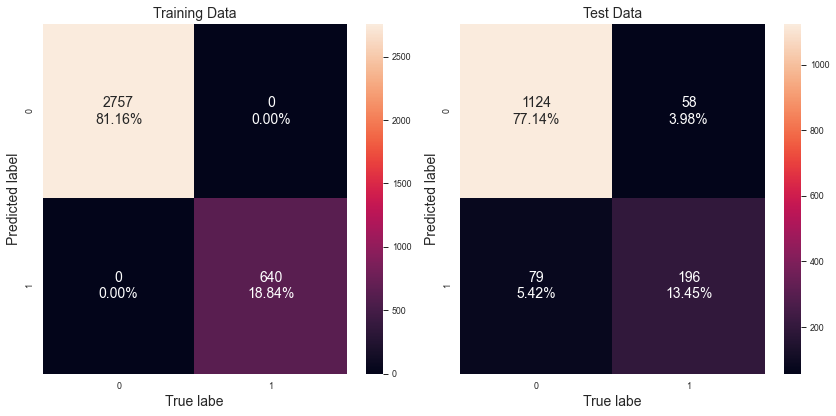

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_classification("Default Decision Tree", dtree)

### Observations on  Default Decision Tree Model

* We know Decision tree tend on overfit, We can see that Training has Recall 100% and F1 Score 100%, But Test only has  71.23% Recall and 74% F1 Score.

* This model is overfit data. We have to improvise decision tree with tuning. 


## Model building - Bagging - Default Classifier

In [108]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [109]:
bagging_model_perf = model_performance_classification(
    "Default Bagging Classifier", bagging
)
bagging_model_perf

Model 'Default Bagging Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Bagging Classifier,Training,97.188,98.340,99.382,99.520,98.539
1,Default Bagging Classifier,Test,61.091,71.036,90.597,84.848,79.276


<IPython.core.display.Javascript object>

Model 'Default Bagging Classifier' confusion matrix 




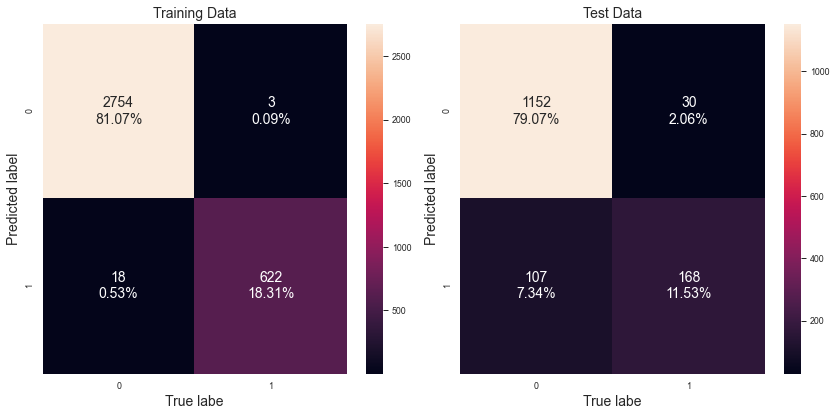

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_classification("Default Bagging Classifier", bagging)

### Observations on  Default  Bagging Classifier

* We can see that Training Recall & F1 Score does not match closely with Tresting Recall and F1-Score. 

* This model is overfit data. We have to improvise with hyper param tuning


## Model - Default Bagging Classifier with weighted decision tree

In [111]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train, y_train)




BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

In [112]:
bagging_model_wt_perf = model_performance_classification(
    "Bagging Classifier WT Decision Tree", bagging_wt
)
bagging_model_wt_perf

Model 'Bagging Classifier WT Decision Tree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Bagging Classifier WT Decision Tree,Training,96.250,97.933,99.235,99.676,98.089
1,Bagging Classifier WT Decision Tree,Test,57.091,68.709,90.185,86.264,77.488


<IPython.core.display.Javascript object>

Model 'Bagging Classifier WT Decision Tree' confusion matrix 




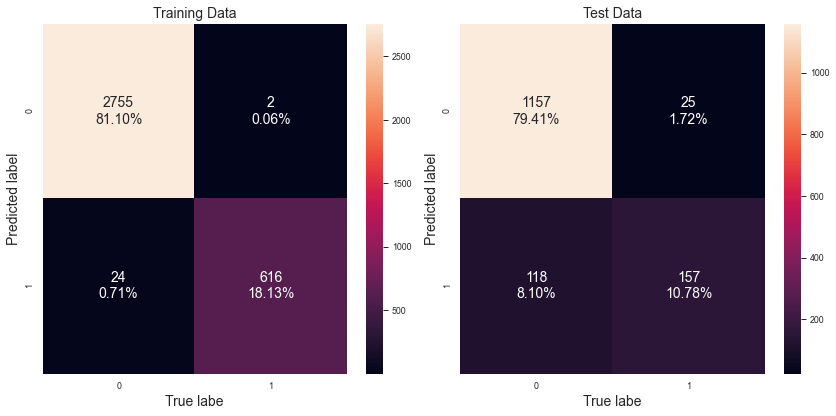

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_classification("Bagging Classifier WT Decision Tree", bagging_wt)

### Observations on  Bagging Classifier with weighted decision tree

* observations are same as default bagging classifier, We have to tune more.

## Model - Random Forest




In [114]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [115]:
rf_model_perf = model_performance_classification("Default Random Forest", rf)
rf_model_perf

Model 'Default Random Forest' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Random Forest,Training,100.000,100.000,100.000,100.000,100.000
1,Default Random Forest,Test,60.727,73.085,91.558,91.758,79.729


<IPython.core.display.Javascript object>

Model 'Default Random Forest' confusion matrix 




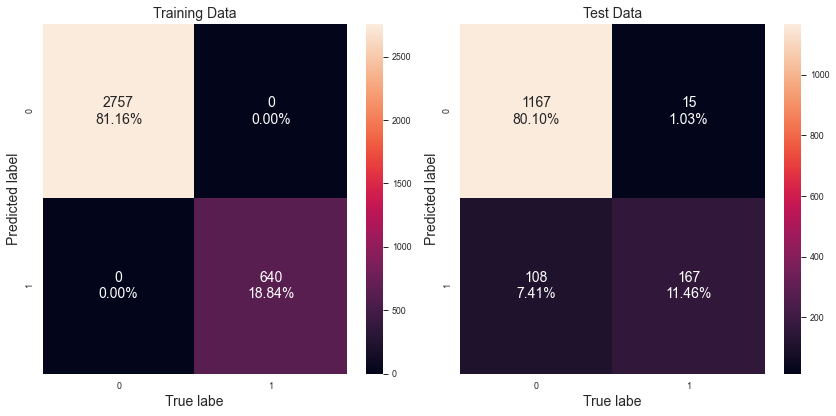

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_classification("Default Random Forest", rf)


### Observations on  Default Random Forest

* We can see that Training Recall & F1 Score does not match closely with Tresting Recall and F1-Score. 

* This model is overfit data. We have to improvise with hyper param tuning

**Random forest with class weights**


In [117]:
rf_wt = RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

In [118]:
rf_model_wt_pref = model_performance_classification("Random Forest with wt", rf_wt)
rf_model_wt_pref

Model 'Random Forest with wt' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Random Forest with wt,Training,100.000,100.000,100.000,100.000,100.000
1,Random Forest with wt,Test,58.182,70.953,91.009,90.909,78.414


<IPython.core.display.Javascript object>

Model 'Random Forest with wt' confusion matrix 




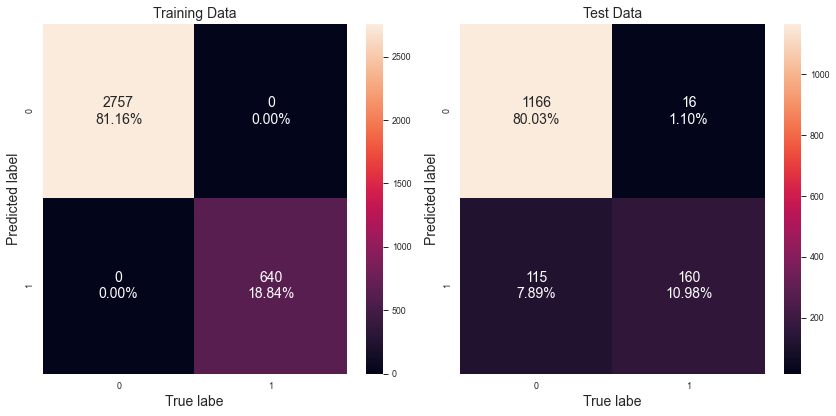

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_classification("Random Forest with wt", rf_wt)




## Model building - Boosting - Default Classifier
### AdaBoost Classifier

In [120]:
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [121]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)



AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [122]:
ab_classifier_pref = model_performance_classification("Default AdaBoost", ab_classifier)
ab_classifier_pref

Model 'Default AdaBoost' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default AdaBoost,Training,32.500,44.068,84.457,68.421,64.509
1,Default AdaBoost,Test,34.182,45.192,84.351,66.667,65.103


<IPython.core.display.Javascript object>

Model 'Default AdaBoost' confusion matrix 




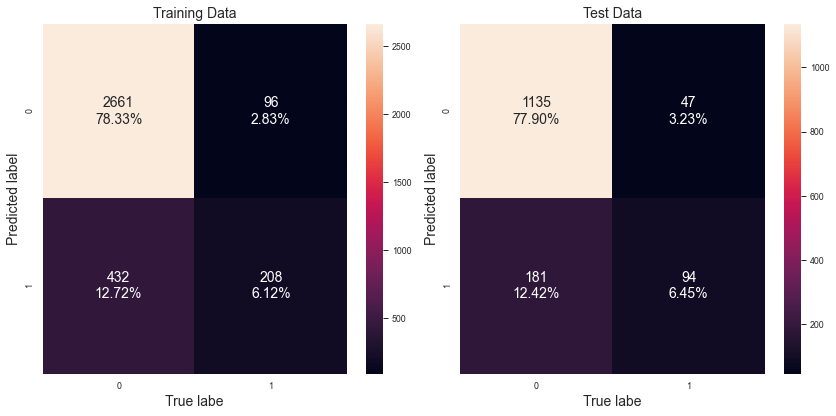

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_classification("Default AdaBoost", ab_classifier)


**observation**
- AdaBoost is giving poor performance, in terms of recall and F1 scores

## Gradient Boosting Classifier

In [124]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)



GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [125]:
gb_classifier_pref = model_performance_classification(
    "Default Gradient Boosting", gb_classifier
)
gb_classifier_pref

Model 'Default Gradient Boosting' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Gradient Boosting,Training,48.438,61.386,88.519,83.784,73.131
1,Default Gradient Boosting,Test,41.818,53.864,86.479,75.658,69.344


<IPython.core.display.Javascript object>

Model 'Default Gradient Boosting' confusion matrix 




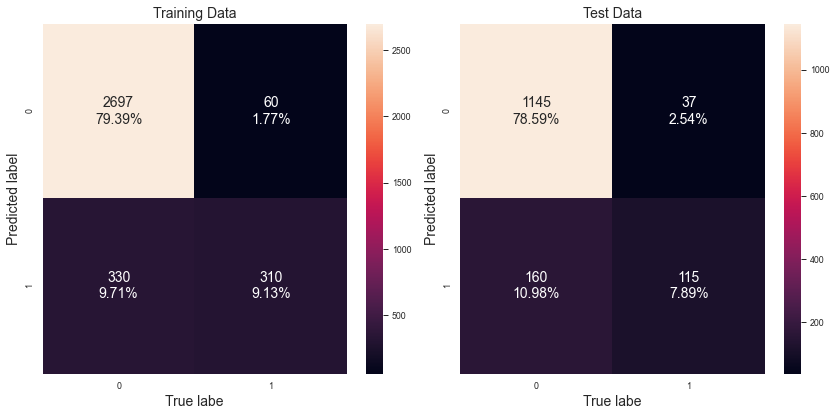

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_classification("Default Gradient Boosting", gb_classifier)

**observation**
- Default Gradient Boosting is giving poor performance, in terms of recall and F1 scores

## XGBoost Classifier

In [127]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [128]:
xgb_classifier_pref = model_performance_classification(
    "Default XGBoost Boosting", xgb_classifier
)
xgb_classifier_pref

Model 'Default XGBoost Boosting' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default XGBoost Boosting,Training,99.844,99.922,99.971,100.000,99.922
1,Default XGBoost Boosting,Test,72.000,78.884,92.725,87.225,84.773


<IPython.core.display.Javascript object>

Model 'Default XGBoost Boosting' confusion matrix 




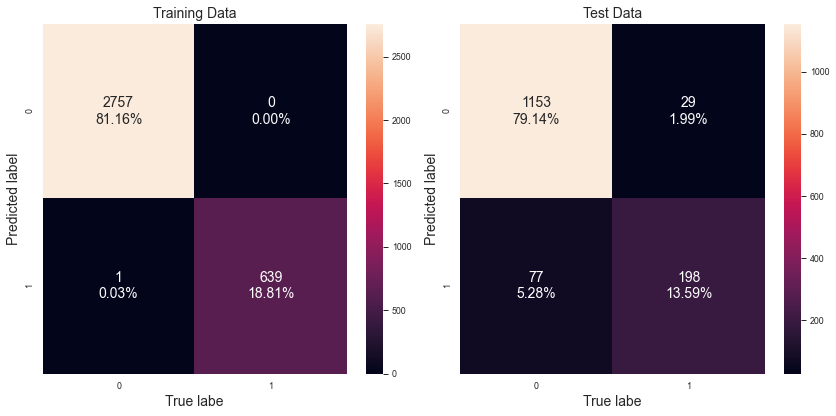

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_classification("Default XGBoost Boosting", xgb_classifier)

**observation**
- Better than previous 2 boosting default modles, in terms of recall and F1 scores this model overfit data. We should tune this model for better performance




### Summary of all default models


In [130]:
pd.concat(
    [
        dtree_model_perf,
        bagging_model_perf,
        bagging_model_wt_perf,
        rf_model_perf,
        rf_model_wt_pref,
        ab_classifier_pref,
        gb_classifier_pref,
        xgb_classifier_pref,
    ],
    axis=0,
)

,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Decision Tree,Training,100.000,100.000,100.000,100.000,100.000
1,Default Decision Tree,Test,71.273,74.102,90.597,77.165,83.183
0,Default Bagging Classifier,Training,97.188,98.340,99.382,99.520,98.539
1,Default Bagging Classifier,Test,61.091,71.036,90.597,84.848,79.276
0,Bagging Classifier WT Decision Tree,Training,96.250,97.933,99.235,99.676,98.089
1,Bagging Classifier WT Decision Tree,Test,57.091,68.709,90.185,86.264,77.488
0,Default Random Forest,Training,100.000,100.000,100.000,100.000,100.000
1,Default Random Forest,Test,60.727,73.085,91.558,91.758,79.729
0,Random Forest with wt,Training,100.000,100.000,100.000,100.000,100.000
1,Random Forest with wt,Test,58.182,70.953,91.009,90.909,78.414


<IPython.core.display.Javascript object>

### Observations on  all default models 

* We can see that Training Recall & F1 Score does not match closely with Tresting Recall and F1-Score. 

* All model is overfit. We have to improvise with hyper param tuning


## Performance improvement  - Tuning Models with hyperparameters

### Model performance improvement - Bagging

**Tuning Decision Tree**

In [131]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.17, 1: 0.83}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10, 2),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

<IPython.core.display.Javascript object>

In [132]:
dtree_estimator_pref = model_performance_classification(
    "Tuned Decision Tree", dtree_estimator
)
dtree_estimator_pref

Model 'Tuned Decision Tree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Decision Tree,Training,100.0,31.707,18.840,18.840,50.0
1,Tuned Decision Tree,Test,100.0,31.755,18.874,18.874,50.0


<IPython.core.display.Javascript object>

Model 'Tuned Decision Tree' confusion matrix 




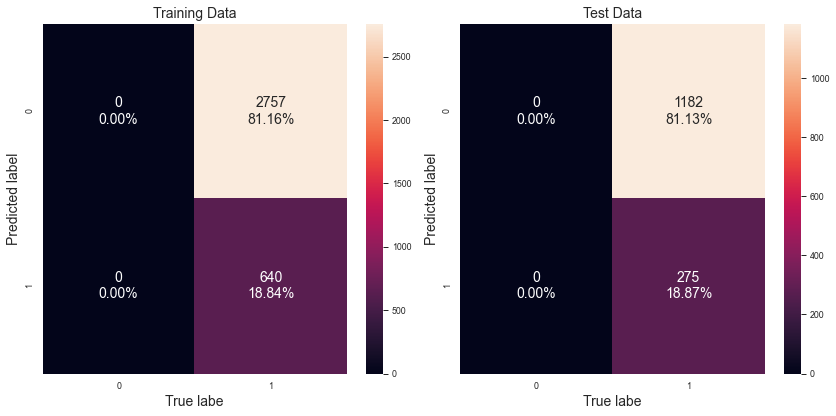

<IPython.core.display.Javascript object>

In [133]:
confusion_matrix_classification("Tuned Decision Tree", dtree_estimator)

### Observations on  Tuned Decision Tree

* Perfect Recall score but F1 Score is really bad, This does not indentify any True postive customers. We need to tune more.

**Tuning Decision Tree**


In [134]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.20, 1: 0.80}, random_state=1
)

""""
parameters = {
    "splitter": ["best", "gini", "entropy"],
    "min_impurity_decrease": [0.0001, 0.001],
    "max_depth": np.arange(2, 100, 20),
    "min_samples_leaf": np.arange(1, 100, 20),
    "max_features": ["log2", "sqrt", None],
    "max_leaf_nodes": np.arange(2, 100, 20),
}
"""

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(0, 100, 5),
    "min_samples_leaf": np.arange(1, 100, 20),
    "max_leaf_nodes": np.arange(2, 100, 20),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "max_features": ["log2", "sqrt", None],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.f1_score)
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)


dtree_estimator_pref = model_performance_classification(
    "Tuned Decision Tree", dtree_estimator
)
dtree_estimator_pref

Model 'Tuned Decision Tree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Decision Tree,Training,86.250,65.094,82.573,52.273,83.985
1,Tuned Decision Tree,Test,75.273,58.557,79.890,47.917,78.119


<IPython.core.display.Javascript object>

Model 'Tuned Decision Tree' confusion matrix 




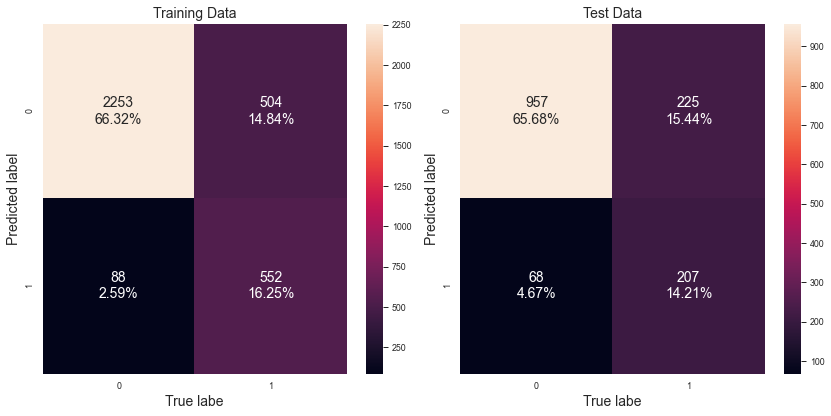

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_classification("Tuned Decision Tree", dtree_estimator)


### Observations on  Tuned Decision Tree

* Better than previous model. But still this model has some false postives. 
* Overfitting in decision tree has reduced but the accuracy/f1-score has also reduced.

**Tuning Bagging Classifier**

In [136]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)


# Grid of parameters to choose from
parameters = {'max_samples': [0.5,0.6,0.7,0.8,0.9,1], 
              'max_features': [0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,75,100],
              'base_estimator':[dtree_estimator],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
#acc_scorer = metrics.make_scorer(metrics.f1_score)
# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

bagging_estimator_pref = model_performance_classification(
    "Tuned Bagging Classifier", bagging_estimator_tuned
)
bagging_estimator_pref


Model 'Tuned Bagging Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Bagging Classifier,Training,87.344,78.401,90.933,71.120,89.555
1,Tuned Bagging Classifier,Test,67.273,62.185,84.557,57.812,77.926


<IPython.core.display.Javascript object>

Model 'Tuned Bagging Classifier' confusion matrix 




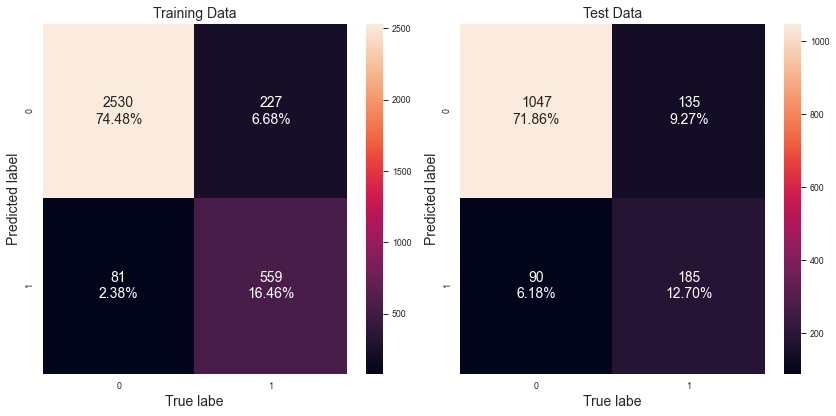

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_classification("Tuned Bagging Classifier", bagging_estimator_tuned)


### Observations on Tuned Bagging Classifier

* Better than previous model. But still this model has some false postives. 
* Overfitting in Bagging Classifier has reduced but the accuracy/f1-score has also reduced.
* still overfit model. We can looks for improvements

**Tuning Random Forest**


In [138]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50],
        "min_samples_leaf": np.arange(5, 100, 20),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
        "min_impurity_decrease": [0.001, 0.01, 0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)


rf_estimator_pref = model_performance_classification(
    "Tuned Random Forest", rf_estimator
)
rf_estimator_pref


Model 'Tuned Random Forest' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Random Forest,Training,89.688,80.561,91.846,73.121,91.017
1,Tuned Random Forest,Test,69.091,65.404,86.205,62.092,79.639


<IPython.core.display.Javascript object>

Model 'Tuned Random Forest' confusion matrix 




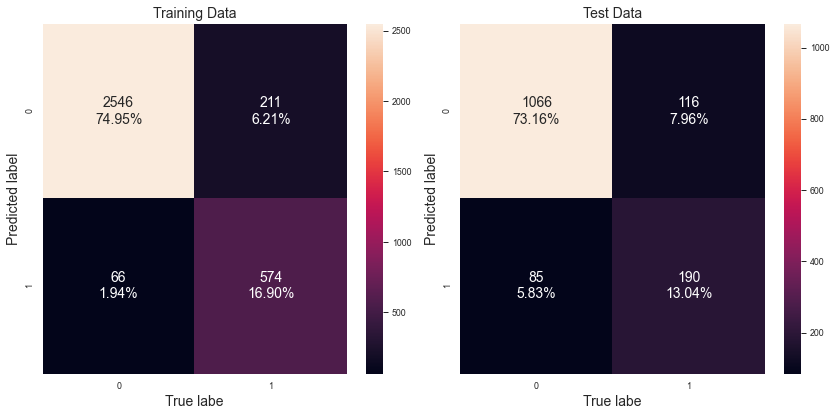

<IPython.core.display.Javascript object>

In [139]:
confusion_matrix_classification("Tuned Random Forest", rf_estimator)

* still we see some overfitting, lets try to improvise 

**Tuning Random Forest approach 2**

In [140]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.20, 1: 0.80}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    # "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": [0.7, 0.9, "sqrt", "log2"],
    # "min_samples_leaf": np.arange(1, 15, 5),
    # "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 30),
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
    "max_samples": [0.7, 0.9, None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

rf_estimator_tuned_pref = model_performance_classification(
    "Tuned Random Forest v2", rf_tuned
)
rf_estimator_tuned_pref

Model 'Tuned Random Forest v2' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Random Forest v2,Training,93.438,84.943,93.759,77.865,93.636
1,Tuned Random Forest v2,Test,72.364,68.858,87.646,65.677,81.782


<IPython.core.display.Javascript object>

Model 'Tuned Random Forest v2' confusion matrix 




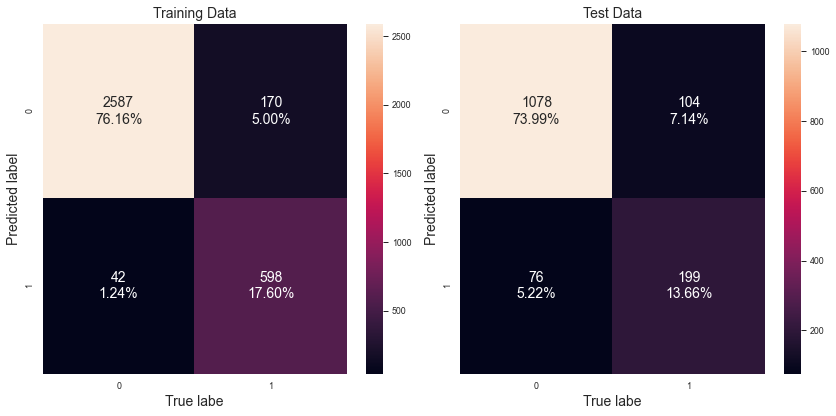

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_classification("Tuned Random Forest v2", rf_tuned)

### Observations on Tuned Random Forest

* Improved compared to previous modeles
* We still see some overfit, But better recall and f1 score compared to previous models


### Summary - bagging models -  Comparing all the models

after trying multiple hyper parameter configuration, end up with current configuration that has good Recall and F1 Score.



In [142]:
pd.concat(
    [
        dtree_estimator_pref,
        bagging_estimator_pref,
        rf_estimator_pref,
        rf_estimator_tuned_pref,
    ],
    axis=0,
)


,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Decision Tree,Training,86.250,65.094,82.573,52.273,83.985
1,Tuned Decision Tree,Test,75.273,58.557,79.890,47.917,78.119
0,Tuned Bagging Classifier,Training,87.344,78.401,90.933,71.120,89.555
1,Tuned Bagging Classifier,Test,67.273,62.185,84.557,57.812,77.926
0,Tuned Random Forest,Training,89.688,80.561,91.846,73.121,91.017
1,Tuned Random Forest,Test,69.091,65.404,86.205,62.092,79.639
0,Tuned Random Forest v2,Training,93.438,84.943,93.759,77.865,93.636
1,Tuned Random Forest v2,Test,72.364,68.858,87.646,65.677,81.782


<IPython.core.display.Javascript object>

### Feature importance of Random Forest

In [143]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Imp"], index=X_train.columns,
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Passport                     0.131899
DurationOfPitch              0.127681
MonthlyIncome                0.121955
Designation_Executive        0.082199
PitchSatisfactionScore       0.060533
NumberOfTrips                0.058619
CityTier                     0.058160
NumberOfFollowups            0.049725
PreferredPropertyStar        0.043122
MaritalStatus_Single         0.029252
MaritalStatus_Married        0.020341
TypeofContact_Self Enquiry   0.020224
MaritalStatus_Unmarried      0.019396
Gender_Male                  0.017622
AgeRange_19 to 29            0.016975
AgeRange_30 to 39            0.014538
NumberOfPersonVisiting       0.013818
Occupation_Large Business    0.013054
NumberOfChildrenVisiting     0.012906
AgeRange_40 to 49            0.011495
OwnCar                       0.010895
Occupation_Small Business    0.010696
Occupation_Salaried          0.010441
AgeRange_50 to 59            0.008116
Designation_Manager          0.007801
Designation_

<IPython.core.display.Javascript object>

In [144]:
feature_names = X_train.columns

<IPython.core.display.Javascript object>

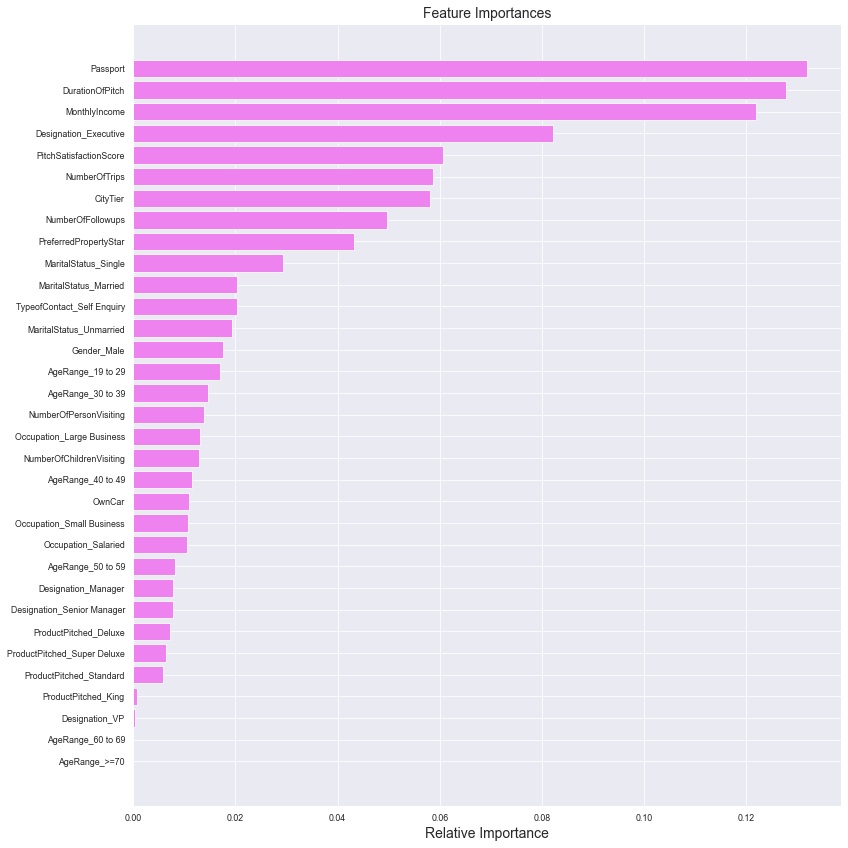

<IPython.core.display.Javascript object>

In [145]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations on Feature importance

* Top 4 Features are Duration of pitch, Owns passport or not, Monthly Income and Designations Executive position.

##  Model performance improvement - Boosting

### AdaBoost Classifier


In [146]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(
            max_depth=1, random_state=1, class_weight={0: 0.20, 1: 0.80},
        ),
        DecisionTreeClassifier(
            max_depth=2, random_state=1, class_weight={0: 0.20, 1: 0.80},
        ),
        DecisionTreeClassifier(
            max_depth=3, random_state=1, class_weight={0: 0.20, 1: 0.80},
        ),
    ],
    "n_estimators": np.arange(10, 160, 40),
    "learning_rate": np.arange(0.1, 1.1, 0.2),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
# acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

abc_tuned_pref = model_performance_classification("Tuned AdaBoost", abc_tuned)
abc_tuned_pref

Model 'Tuned AdaBoost' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned AdaBoost,Training,72.500,53.029,75.802,41.802,74.534
1,Tuned AdaBoost,Test,76.364,52.632,74.056,40.153,74.942


<IPython.core.display.Javascript object>

Model 'Tuned AdaBoost' confusion matrix 




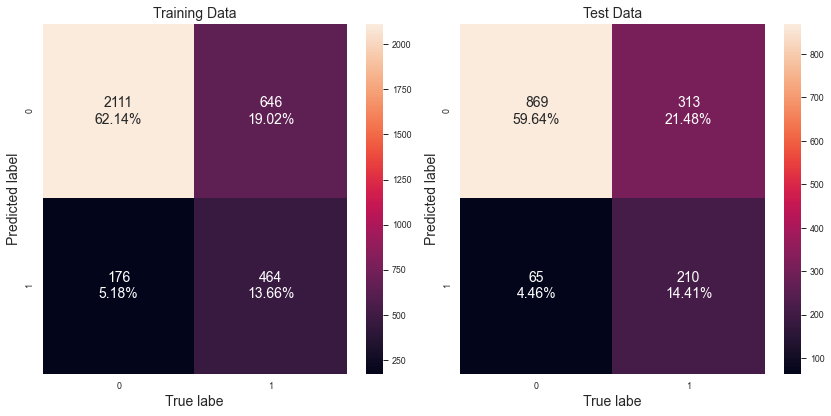

<IPython.core.display.Javascript object>

In [147]:
confusion_matrix_classification("Tuned AdaBoost", abc_tuned)

### Observations on tuned AdaBoost Classifier

* Model is not overfitting, Recall scores are above 70% for both training and testing. But the f1 scores are lesser. 
* This model still miss few customers in both classes. 


### Gradient Boosting Classifier


In [148]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.f1_score)
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

gbc_tuned_pref = model_performance_classification("Tuned GradientBoost", gbc_tuned)
gbc_tuned_pref

Model 'Tuned GradientBoost' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned GradientBoost,Training,64.844,76.077,92.317,92.018,81.769
1,Tuned GradientBoost,Test,50.182,60.659,87.714,76.667,73.314


<IPython.core.display.Javascript object>

Model 'Tuned GradientBoost' confusion matrix 




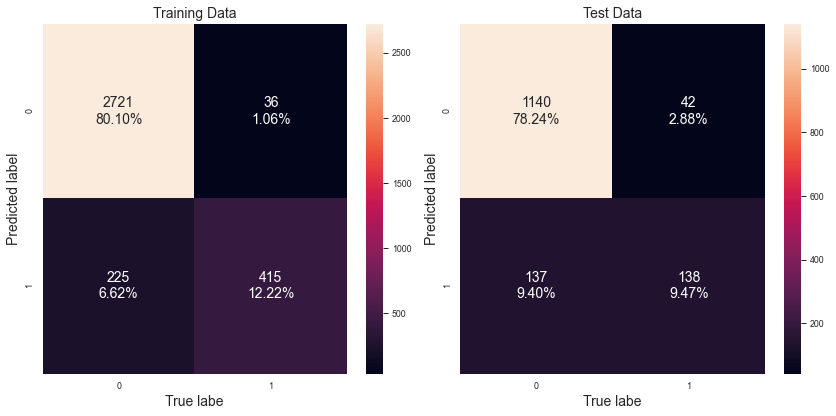

<IPython.core.display.Javascript object>

In [149]:
confusion_matrix_classification("Tuned GradientBoost", gbc_tuned)

### Observations on tuned Gradient Boost Classifier

* This model does not have good recall score or f1 score. 
* Overfitting on training data, But recall score is very poor. We cannot use this model for business

### XGBoost Classifier


In [150]:
# Choose the type of classifier.
# xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

xgb_tuned = XGBClassifier(
    learning_rate=0.01,
    n_estimators=100,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective="binary:logistic",
    nthread=4,
    scale_pos_weight=5,
    seed=27,
    eval_metric="logloss",
)

# Grid of parameters to choose from
parameters = {
    # "n_estimators": [1000],
    # "scale_pos_weight": [4, 5, 6, 7, 10],
    # "subsample": [0.4, 0.5, 0.6],
    # "learning_rate": np.arange(0.01, 0.1, 0.01),
    # "gamma": [0, 1, 3, 5, 7, 10],
    # "colsample_bytree": [0.5, 0.7, 0.9, 1],
    # "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}
# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.f1_score)
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

xgb_tuned_pref = model_performance_classification("Tuned XGBoost", xgb_tuned)
xgb_tuned_pref

Model 'Tuned XGBoost' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned XGBoost,Training,76.406,60.520,81.219,50.102,79.371
1,Tuned XGBoost,Test,73.455,56.111,78.312,45.393,76.448


<IPython.core.display.Javascript object>

Model 'Tuned XGBoost' confusion matrix 




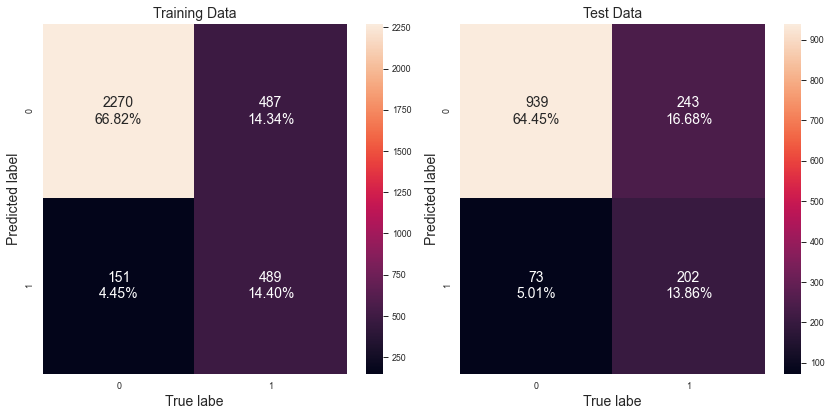

<IPython.core.display.Javascript object>

In [151]:
confusion_matrix_classification("Tuned XGBoost", xgb_tuned)

### Observations on tuned XGBoost Classifier

Note : Tuning was little difficult since it take more time to run so tried few options and decided based of recall score and f1 score.

* This Model does not Overfit data. Best Recall score we got in test data so far.  
* Recall and F1 scores are better than previous 2 models 

### Stacking Classifier

In [152]:
estimators = [('Random Forest',rf_estimator),('Random Forest Tuned',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator),('Bagging',bagging_estimator_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)



StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_features=0.9,
                                                       max_samples=0.9,
                                                       min_impurity_decrease=0.001,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_features=0.9,
                                                       min_impur

<IPython.core.display.Javascript object>

In [153]:
stacking_classifier_pref = model_performance_classification(
    "Stacking Classifier", stacking_classifier
)
stacking_classifier_pref

Model 'Stacking Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Stacking Classifier,Training,99.688,77.193,88.902,62.981,93.043
1,Stacking Classifier,Test,89.818,64.491,81.332,50.305,84.588


<IPython.core.display.Javascript object>

Model 'Stacking Classifier' confusion matrix 




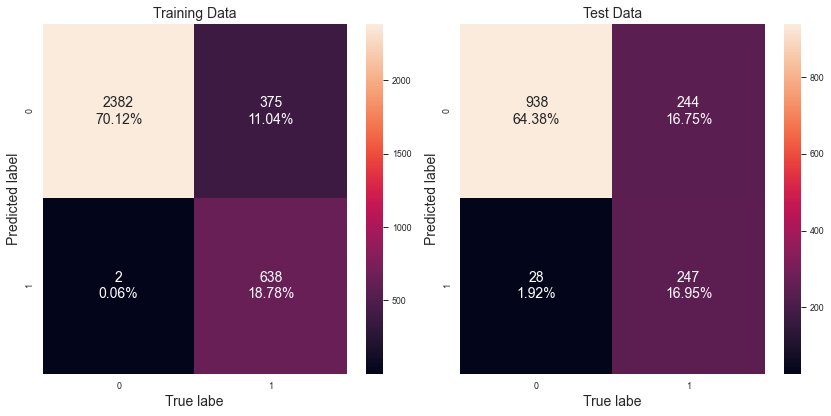

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_classification("Stacking Classifier", stacking_classifier)

### Observations on Stacking Classifier

* stacking overfit little, But better recall and f1 score so far, best model compared to all boosting models.


### Summary - boosting models -  Comparing all the models

after trying multiple hyper parameter configuration, end up with current configuration that has good Recall and F1 Score.



In [155]:
pd.concat(
    [
        abc_tuned_pref,
        gbc_tuned_pref,
        xgb_tuned_pref,
        stacking_classifier_pref,
    ],
    axis=0,
)


,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned AdaBoost,Training,72.500,53.029,75.802,41.802,74.534
1,Tuned AdaBoost,Test,76.364,52.632,74.056,40.153,74.942
0,Tuned GradientBoost,Training,64.844,76.077,92.317,92.018,81.769
1,Tuned GradientBoost,Test,50.182,60.659,87.714,76.667,73.314
0,Tuned XGBoost,Training,76.406,60.520,81.219,50.102,79.371
1,Tuned XGBoost,Test,73.455,56.111,78.312,45.393,76.448
0,Stacking Classifier,Training,99.688,77.193,88.902,62.981,93.043
1,Stacking Classifier,Test,89.818,64.491,81.332,50.305,84.588


<IPython.core.display.Javascript object>


### Summary -  Comparing all the models - To Pick best model 


In [156]:
pd.concat(
    [
        dtree_estimator_pref,
        bagging_estimator_pref,
        rf_estimator_pref,
        rf_estimator_tuned_pref,
        abc_tuned_pref,
        gbc_tuned_pref,
        xgb_tuned_pref,
        stacking_classifier_pref,
    ],
    axis=0,
)

,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Decision Tree,Training,86.250,65.094,82.573,52.273,83.985
1,Tuned Decision Tree,Test,75.273,58.557,79.890,47.917,78.119
0,Tuned Bagging Classifier,Training,87.344,78.401,90.933,71.120,89.555
1,Tuned Bagging Classifier,Test,67.273,62.185,84.557,57.812,77.926
0,Tuned Random Forest,Training,89.688,80.561,91.846,73.121,91.017
1,Tuned Random Forest,Test,69.091,65.404,86.205,62.092,79.639
0,Tuned Random Forest v2,Training,93.438,84.943,93.759,77.865,93.636
1,Tuned Random Forest v2,Test,72.364,68.858,87.646,65.677,81.782
0,Tuned AdaBoost,Training,72.500,53.029,75.802,41.802,74.534
1,Tuned AdaBoost,Test,76.364,52.632,74.056,40.153,74.942


<IPython.core.display.Javascript object>


After checking all models Recall and F1 Score. Stacking Model produces better recall and F1 Score.

### Feature importance - XGBoost Tuned

In [157]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Passport                     0.216344
Designation_Executive        0.091944
CityTier                     0.046849
MaritalStatus_Single         0.041378
Designation_Senior Manager   0.033800
MaritalStatus_Unmarried      0.033762
PreferredPropertyStar        0.033046
ProductPitched_Deluxe        0.031276
MaritalStatus_Married        0.030984
Designation_Manager          0.029566
ProductPitched_Standard      0.029473
DurationOfPitch              0.027953
PitchSatisfactionScore       0.027164
ProductPitched_Super Deluxe  0.025877
NumberOfFollowups            0.025797
MonthlyIncome                0.025193
AgeRange_50 to 59            0.024719
NumberOfTrips                0.024410
Occupation_Large Business    0.022839
AgeRange_30 to 39            0.022603
OwnCar                       0.022443
AgeRange_19 to 29            0.021158
Occupation_Salaried          0.020512
NumberOfChildrenVisiting     0.017817
NumberOfPersonVisiting       0.017284
Gender_Male 

<IPython.core.display.Javascript object>

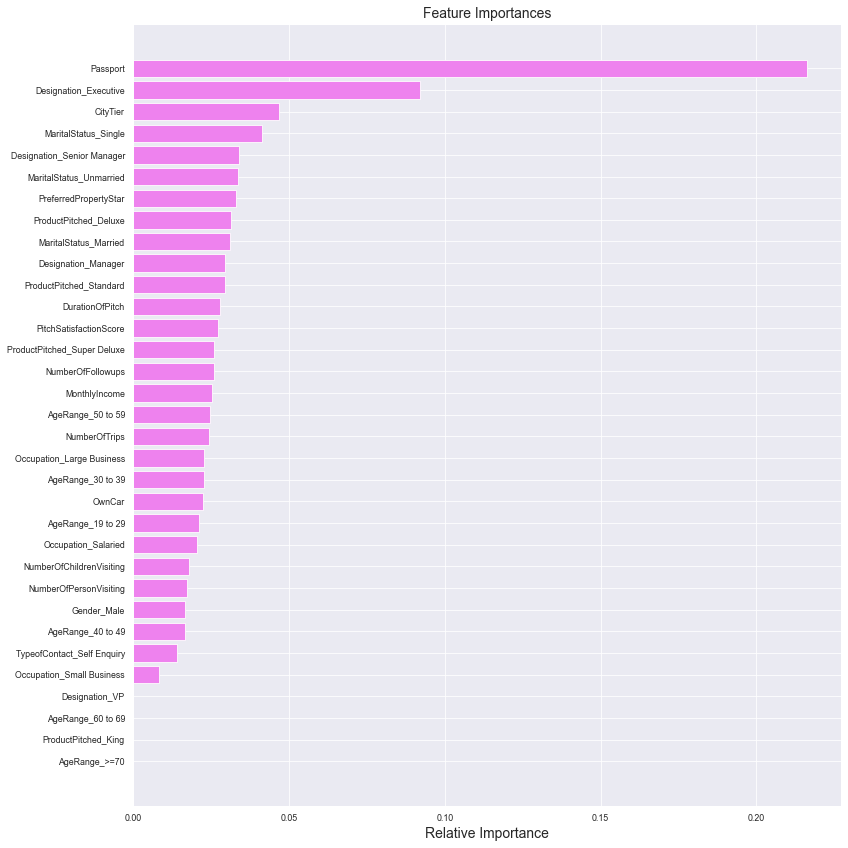

<IPython.core.display.Javascript object>

In [158]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

* We have been able to build a predictive model:
  * ) that company can deploy this model to identify customer who likely to buy tour packages.
  * ) that company can use to find the customers of intrest and improve sales
  * ) based on which company can take appropriate actions to build better products and improve sales
  

#### Key Features  
  
* Factors that improve product sales are Monthly Income, Duration of pitch, Owns passport, Designation as Executive and Number of trips. Other features are also important but not as much as above listed.

#### Key Insights - Company should target customers with below to improve sales 

* Owns Passport 
* Age Range 18 to 39 
* Who has took trips less than 4 in current year
*  Customer with income 20K to 33K for basic, standard and deluxe package. King & Super deluxe can be reached to VP & AVP level customers because of higher income 
* Company should do 3 to 5 followup sells most of the product.
* Customers like package with 10 to 24 days, compared to other durations. Company should promote these packages more.
* Company should invite more customers thru followups to improve sales 
* Single and Unmarried has taken product more compared to married or divorced. 37% single taken product, 22% unmarried has taken product. 16% both divorced and married has taken product
* Most common are 3 person visting tour 49.2%, 2nd common are 29% are 2 person visiting - Company should targer these family group to improve sales 
* Company should consider improve pitch score for 1 and 2 rated, because they dont sell well compared to other pitch scores.
* 2 to 4 people visting with income rnage 20K to 30K took product more than other income range and persons visiting. Company should target this type of customer to improve sales.
* Income with 20k to 30K with duration 12 to 24 days are most sold, Company should target this type of customer to improve sales.
* we see 3 to 6 followup sold more product comapred to less followups, Company should target this type of customer to improve sales.
* 2 to 4 trips with income range 20K to 35K took more product compared to others , Company should target this type of customer to improve sales.


In [159]:
end = datetime.datetime.now()
print(f'Total Time Taken : {end-start}')


Total Time Taken : 0:05:55.354722


<IPython.core.display.Javascript object>